# Rain Fall Analysis

Zaki Syaiful Hunafa

RMT-018

## 1. Introduction

The Rain in Australia dataset contains weather data collected from various locations in Australia. The dataset includes information about different weather features like temperature, humidity, rainfall, and wind speed. The aim of this dataset is to predict whether it will rain tomorrow in Australia.

In this project, we will analyze the Rain in Australia dataset and build two models: SVC and logistic regression. The dataset contains 23 attributes and 142,193 instances, which makes it a relatively large dataset.

Flow:

1. Analyze Insights of Data: We will start by analyzing the dataset and extracting insights from it. We will use various statistical and visual methods to understand the data.

2. Handle NaN values, outliers, and imbalanced data: Next, we will handle missing values and outliers in the dataset. We will also check if the dataset is balanced or not and handle the imbalance if present.

3. Scale and Encode Data: We will scale the numerical features in the dataset and encode the categorical features.

4. Define and Train Model: We will define the SVC and logistic regression models and train them on the preprocessed dataset.

5. Evaluate Model using Random Search and Grid Search: We will evaluate the models using random search and grid search to find the best hyperparameters for the models.

6. Save Model: We will save the best models to disk for later use.

7. Test Model using Inference Dataset: We will test the models on a separate dataset to evaluate their performance.

8. Conclusion: Finally, we will draw conclusions about the performance of the models and discuss any limitations of our approach. We will also suggest future directions for improving the models.

## 2. Import Libraries

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from scipy import stats
from sklearn.utils import shuffle

# split model
from sklearn.model_selection import train_test_split

# Handle Outliers
from feature_engine.outliers import Winsorizer

# To Encode Categorical Column
from sklearn.preprocessing import OneHotEncoder

# To Scalling Numerical Column
from sklearn.preprocessing import MinMaxScaler

# Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluate Regression Models
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score,precision_score, recall_score, accuracy_score

# Hyperparam
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score


# Handling imbalance data
from imblearn.over_sampling import SMOTENC

# Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline


# Save model
import json
import joblib
import compress_pickle as cp
import os

import warnings
warnings.filterwarnings('ignore')

## 3. Data Loading

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
# show first 10 data
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [4]:
# show last 10 data
df.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145450,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,No
145451,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
145452,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
145453,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


From the above dataset, here is the description of each column:

Name | Definition
---|---
`Date` | Date of data recorded
`Location` | Location of data recorded
`MinTemp`  | The minimum temperature in degrees celsius        
`MaxTemp`  | The maximum temperature in degrees celsius        
`Rainfall`  | The amount of rainfall recorded for the day in mm      
`Evaporation`| The so-called Class A pan evaporation (mm) in the 24 hours to 9am      
`Sunshine` | The number of hours of bright sunshine in the day.    
`WindGustDir`  | The direction of the strongest wind gust in the 24 hours to midnight    
`WindGustSpeed` | The speed (km/h) of the strongest wind gust in the 24 hours to midnight   
`WindDir9am` | Direction of the wind at 9am      
`WindDir3pm` | Direction of the wind at 3pm      
`WindSpeed9am` | Wind speed (km/hr) averaged over 10 minutes prior to 9am    
`WindSpeed3pm`| Wind speed (km/hr) averaged over 10 minutes prior to 3pm     
`Humidity9am` | Humidity (percent) at 9am     
`Humidity3pm` | Humidity (percent) at 3pm     
`Pressure9am` | Atmospheric pressure (hpa) reduced to mean sea level at 9am     
`Pressure3pm` | Atmospheric pressure (hpa) reduced to mean sea level at 3pm     
`Cloud9am` | Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.        
`Cloud3pm` | Fraction of sky obscured by cloud at 3pm. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.       
`Temp9am` | Temperature (degrees C) at 9am          
`Temp3pm` | Temperature (degrees C) at 3pm          
`RainToday` | Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0       
`RainTomorrow` | The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# change column date to datatype
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.shape

(145460, 23)

In this dataset, there are `145,460 rows` of data and `23 columns`

In [8]:
df[df.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


There is no duplciated data found on the dataset

### NaN Values

In [9]:
#getting null values percentage
nan_percentage = df.isnull().sum()[df.isnull().sum() > 0]/len(df)*100
nan_percentage

MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

here we can see some of the features are having NaN values in different portion. My plan for this will be:
1. Delete rows in which the percentage of NaN column is less than 10% 
2. Substitute value if the percentage of NaN is more than 10%

In [10]:
# df before NaN values were handled
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [11]:
# Add New column
df['Year'] = df['Date'].dt.year  

In [12]:
# Change Yes and No to 1 and 0
# Define a lambda function to map the values to 1 or 0
map_function = lambda x: 1 if x == 'Yes' else 0

# Apply the lambda function to the RainTomorrow column
df['RainTomorrow'] = df['RainTomorrow'].apply(map_function)

# Apply the lambda function to the RainToday column
df['RainToday'] = df['RainToday'].apply(map_function)


In [13]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,2017
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,2017
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,2017
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017


## 4. Exploratory Data Analysis (EDA)

In [14]:
# analyze the rain trend in the dataset
rain_df = df[df['RainTomorrow'] == 1]

In [15]:
rain_df.groupby('Location')['Location'].count().sort_values(ascending=False).head(5)

Location
Portland        1095
Cairns           950
Walpole          949
Dartmoor         922
MountGambier     920
Name: Location, dtype: int64

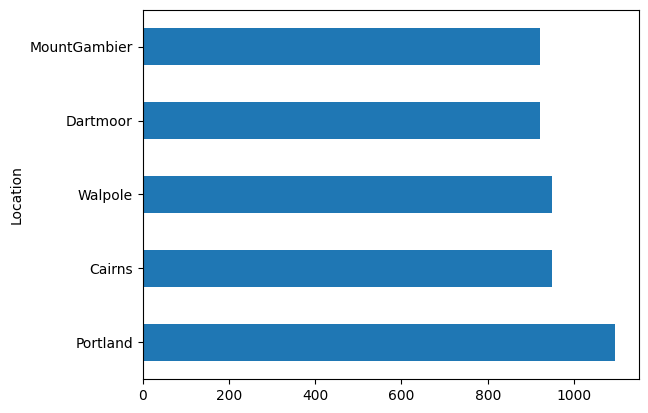

In [16]:
rain_df.groupby('Location')['Location'].count().sort_values(ascending=False).head(5).plot(kind='barh')
plt.show()

Portland becomes the area in aussie between 2007 - 2017 where in total 1,095 days rains were recorded in this area. Followed by Cairns and Walpole.

In [17]:
df.Year.sort_values().unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

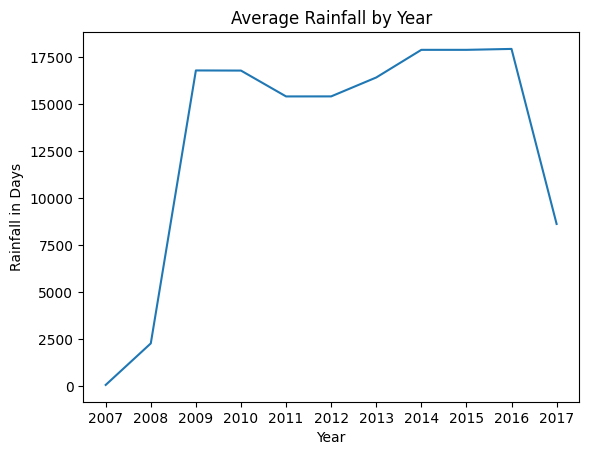

In [18]:
# Group the dataset by year and calculate the average rainfall for each year
df.groupby('Year')['RainTomorrow'].count().plot()

# Set the plot title and axis labels
plt.title('Average Rainfall by Year')
plt.xticks(df['Year'].unique()) 
plt.xlabel('Year')
plt.ylabel('Rainfall in Days')

# Show the plot
plt.show()

The number of rainfall in the Australia is significantly increased during 2018 and decreased from 2016 until 2017

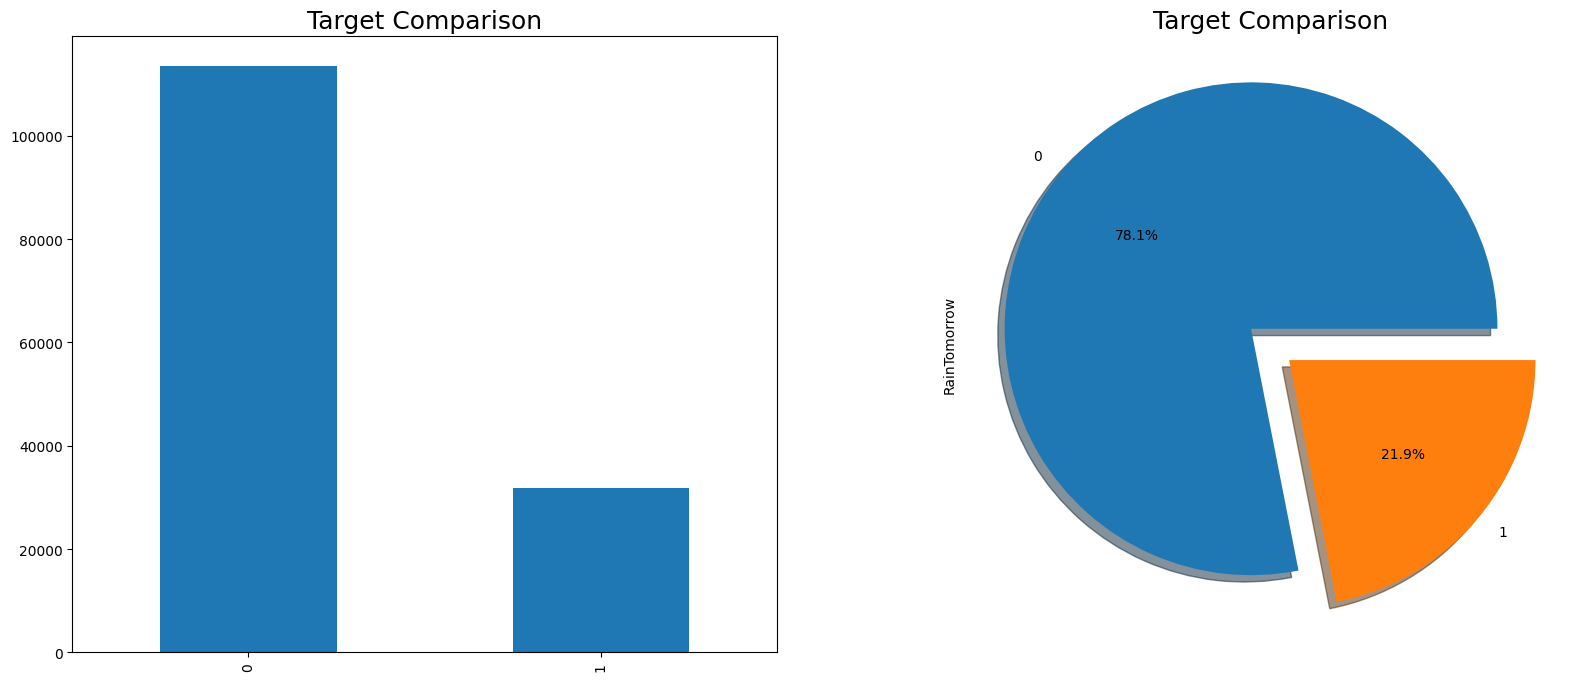

In [19]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 8))

df['RainTomorrow'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,ax=axarr[1])
axarr[1].set_title("Target Comparison", fontsize=18)

df['RainTomorrow'].value_counts().plot(kind='bar',ax=axarr[0])
axarr[0].set_title("Target Comparison", fontsize=18)
plt.show()

The target of the dataset is imbalance, 77.6% for Not Rain and only 22.4% for Rain. Since the imbalance data will result to bias of prediction towards the target this will be handled later on.

# 5. Feature Engineering

### Handling NaN Values

In [20]:
def clean_data(df):
    # Calculate the percentage of null values in each column
    null_percentages = df.isnull().mean() * 100
    
    # Check if the percentage of null values in any column is 0
    if (null_percentages == 0).all():
        # If all columns satisfy this condition, return the original DataFrame
        return df
    else:
        # Otherwise, iterate over each column and either delete rows or substitute null values
        for col in df.columns:
            if null_percentages[col] < 10:
                # If the percentage of null values in the column is below 4%, delete rows with null values
                df = df.dropna(subset=[col])
            else:
                # If the percentage of null values in the column is 4% or higher, substitute null values with the column mean
                df[col] = df[col].fillna(df[col].mean())
    
    return df


In [21]:
new_df = clean_data(df)

In [22]:
new_df.shape

(122568, 24)

In [23]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,122568.0,12.395754,6.332858,-8.5,7.800000,12.200000,17.0,33.9
MaxTemp,122568.0,23.440573,7.138522,-4.8,18.100000,23.000000,28.5,48.1
Rainfall,122568.0,2.363823,8.492881,0.0,0.000000,0.000000,0.8,367.6
Evaporation,122568.0,5.543859,3.241305,0.0,4.000000,5.471953,5.6,82.4
Sunshine,122568.0,7.677214,2.793646,0.0,7.625364,7.625364,9.0,14.5
WindGustSpeed,122568.0,40.700224,13.399533,7.0,31.000000,39.000000,48.0,135.0
WindSpeed9am,122568.0,15.041593,8.330475,2.0,9.000000,13.000000,20.0,87.0
WindSpeed3pm,122568.0,19.213131,8.590260,2.0,13.000000,19.000000,24.0,87.0
Humidity9am,122568.0,67.694953,19.048381,0.0,56.000000,69.000000,82.0,100.0
Humidity3pm,122568.0,50.817359,20.937488,0.0,36.000000,51.000000,65.0,100.0


In this dataset we cann see the dataset covered the data of weather across Australia in 2007-2017. In average the hours of sun shined is 7 hours/day which we can assume that across Australia during these years the weather is rather gloomy or cloudy. In some other data we can see there are minus value but since it belongs to temperature features we can safely assume that the value is valid

### Split Train and Test Set

In [24]:
# Split x and y
X = new_df.drop('RainTomorrow', axis=1)
y = new_df['RainTomorrow'] 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (98054, 23)
Test Size:  (24514, 23)


### Handling Outliers

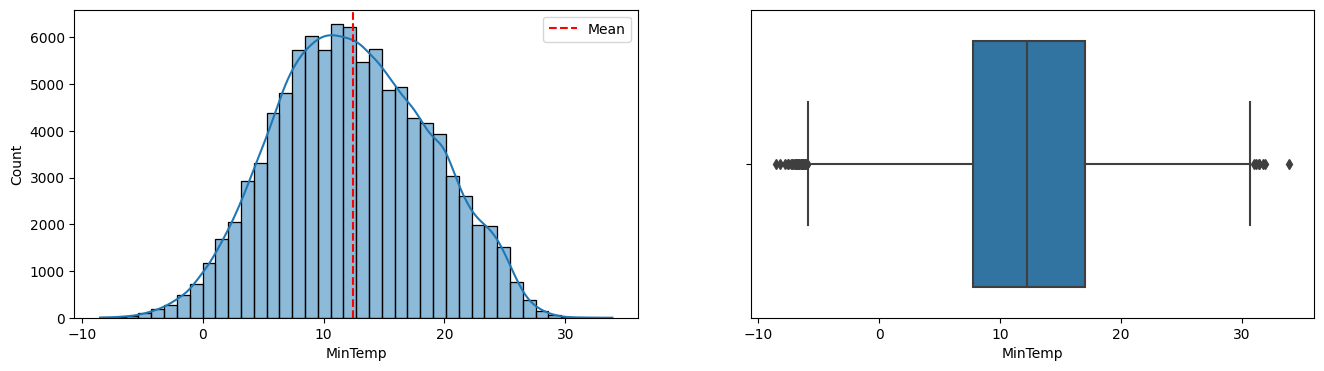

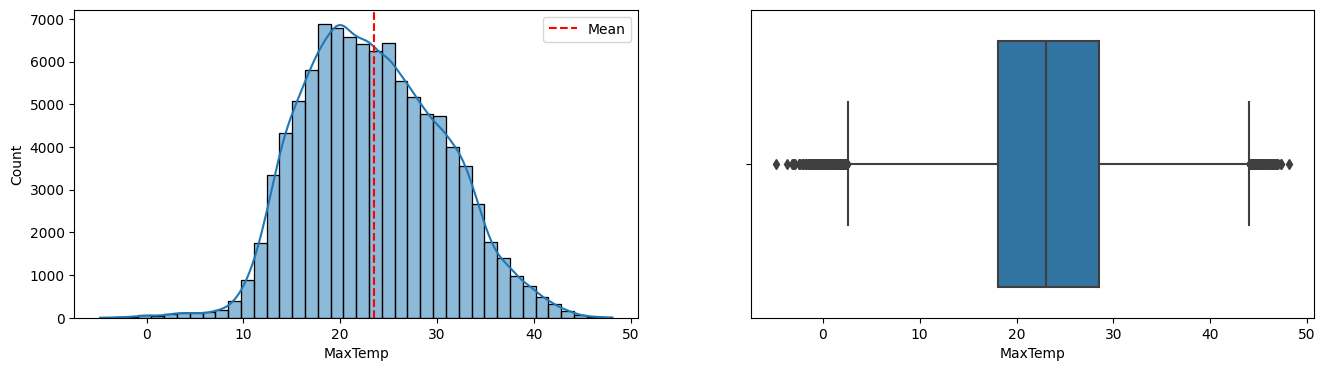

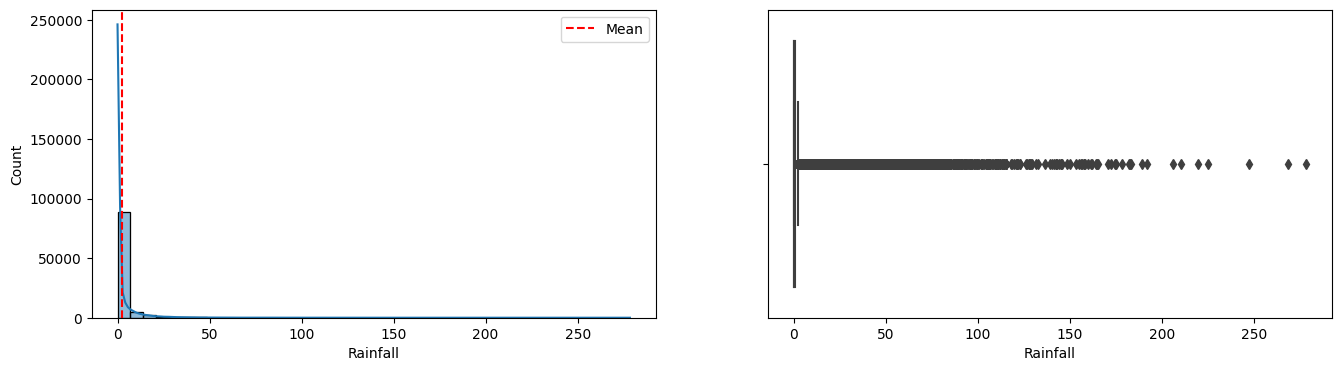

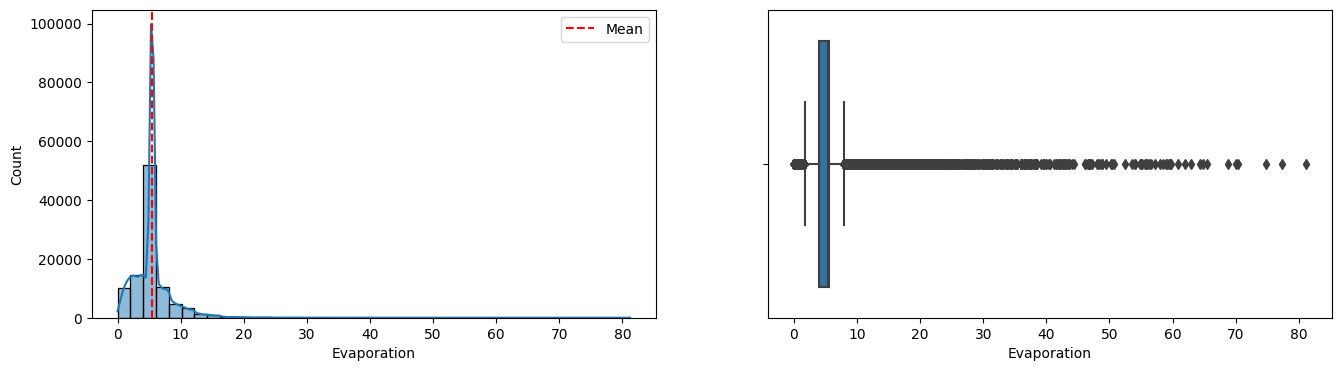

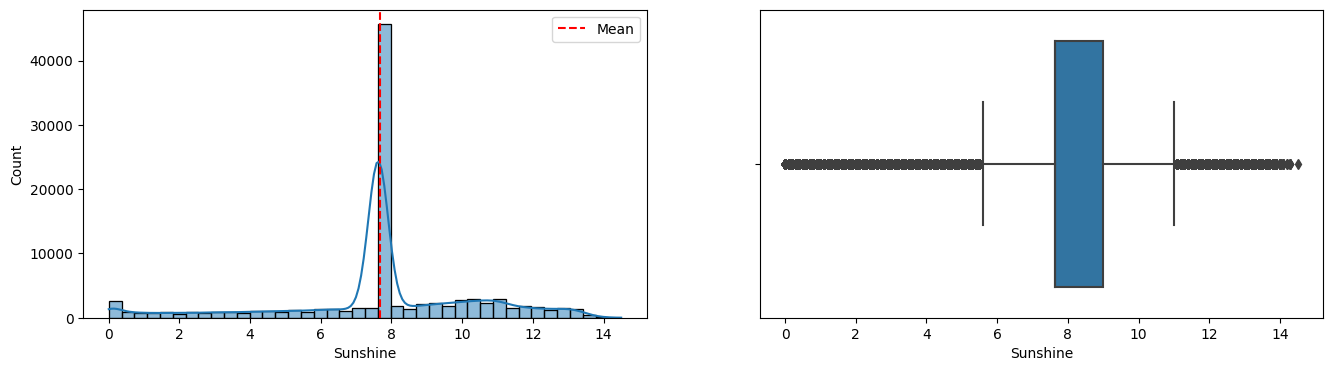

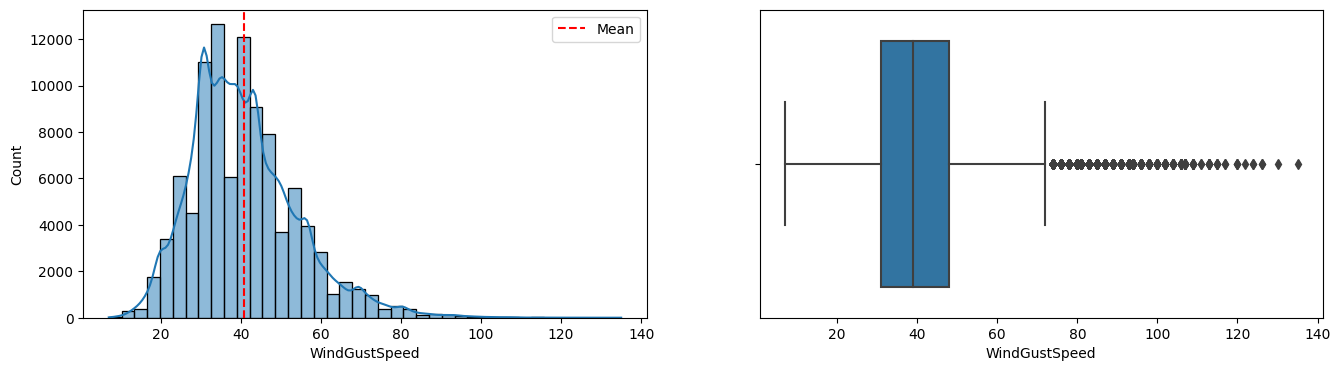

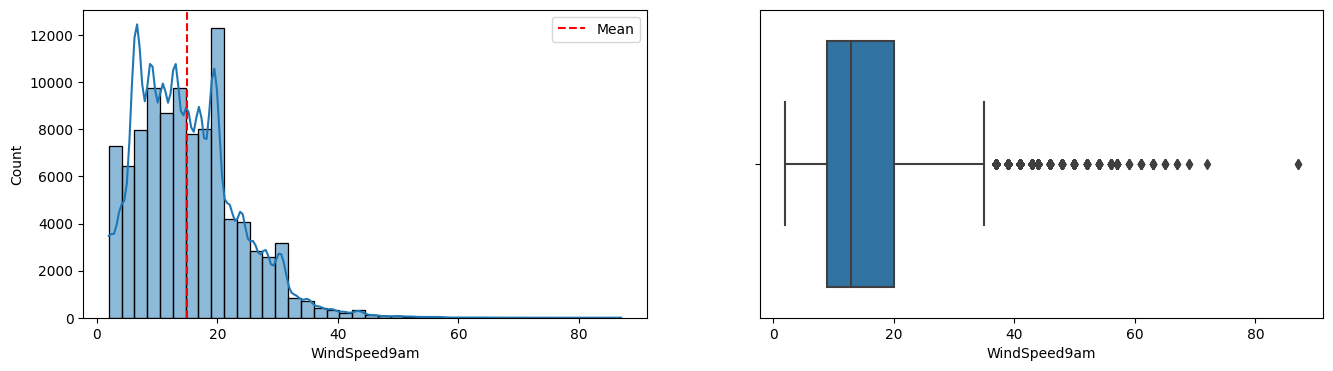

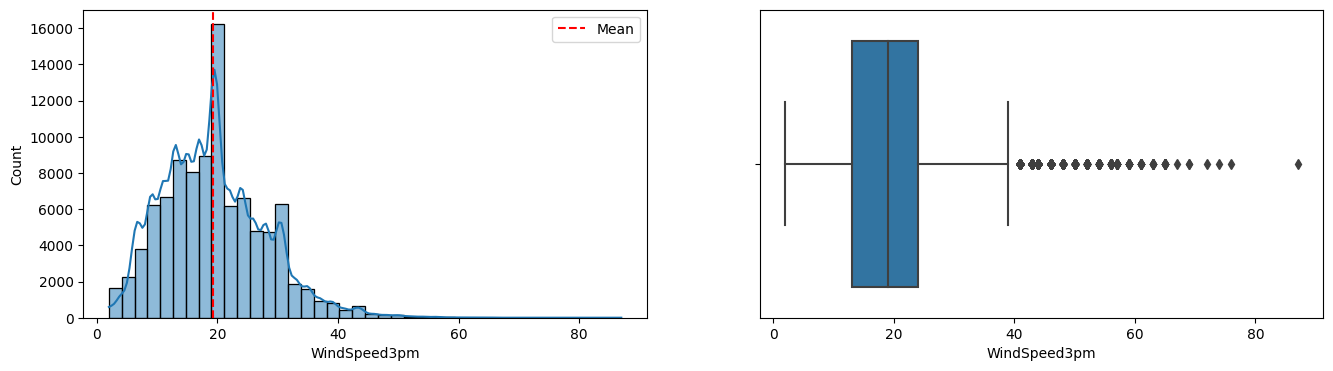

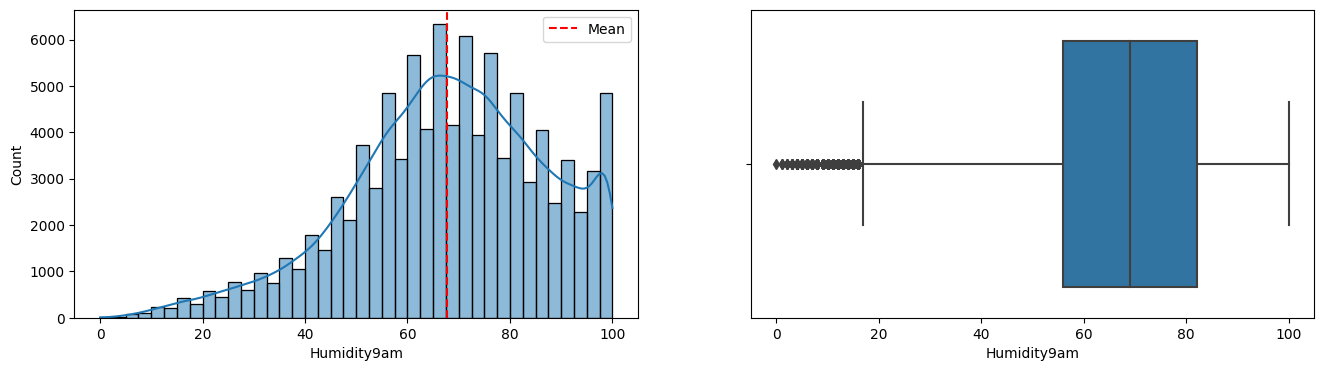

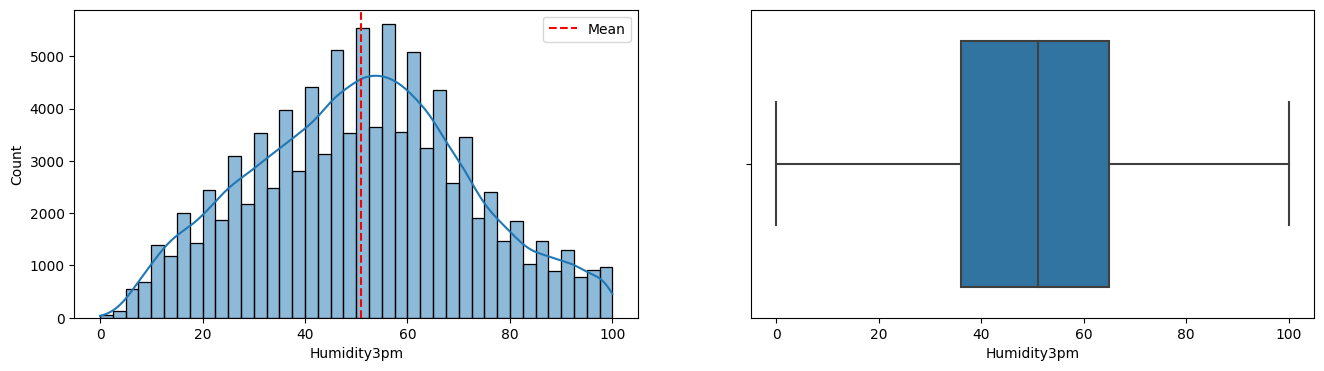

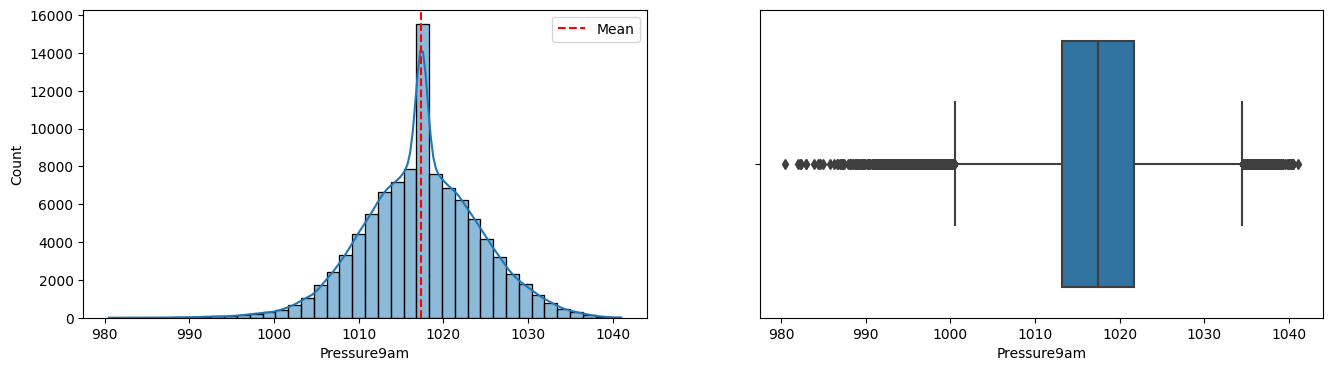

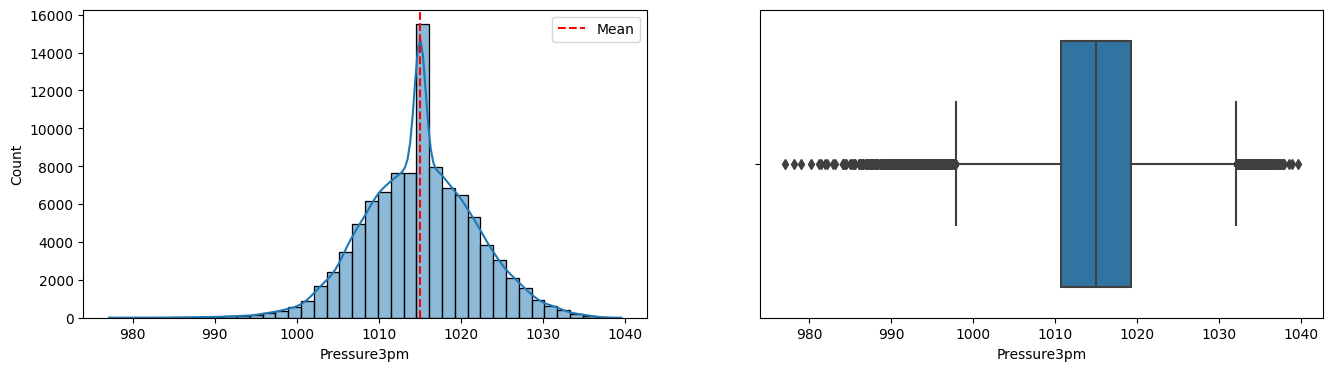

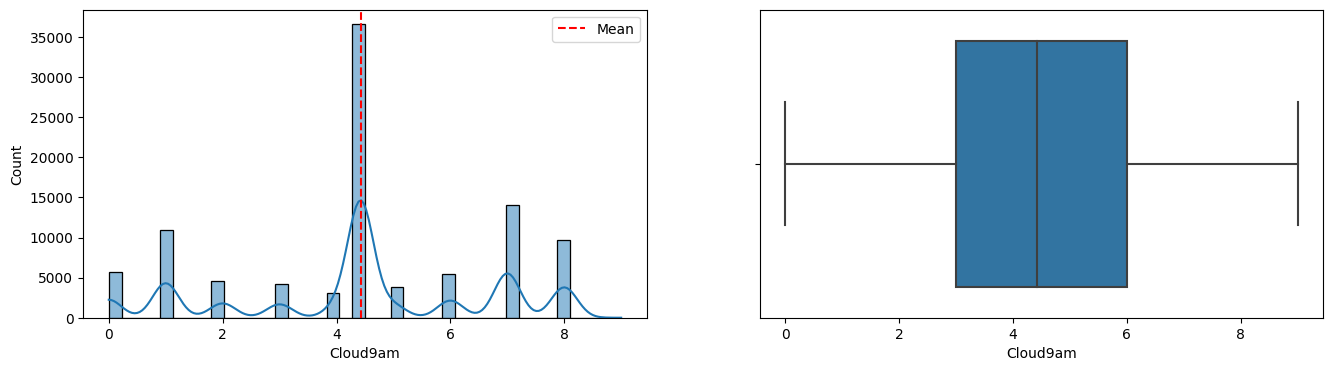

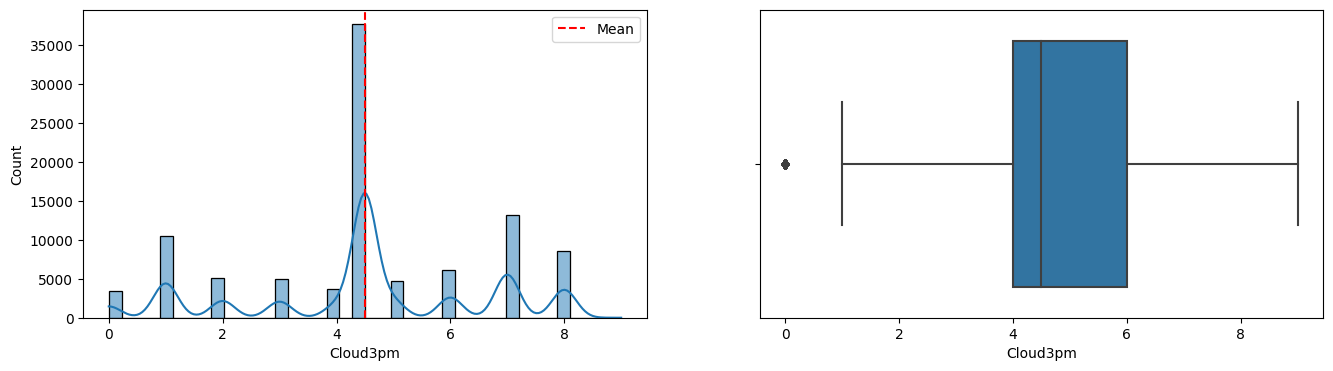

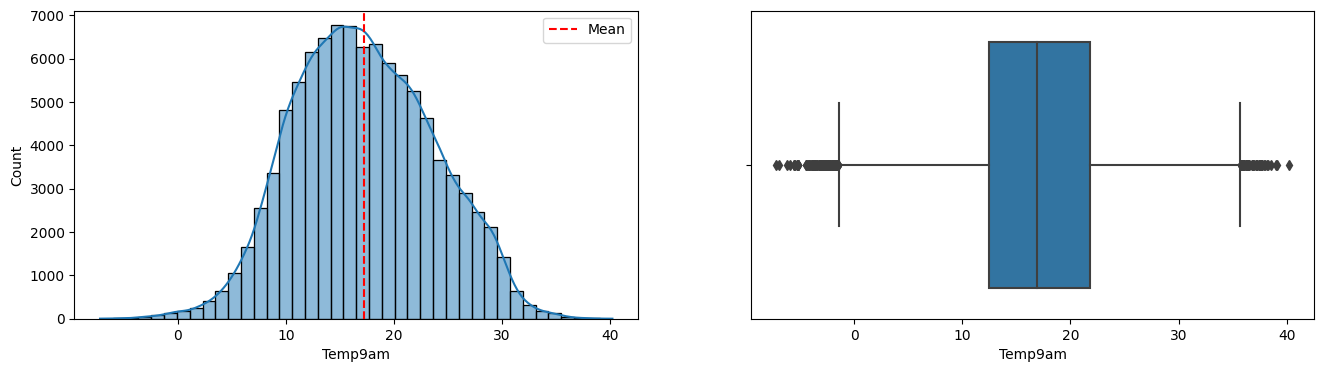

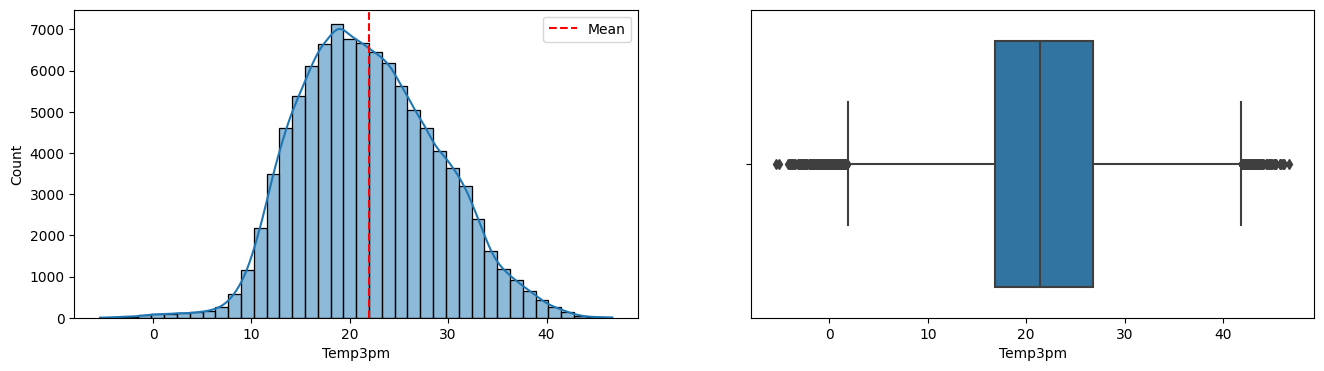

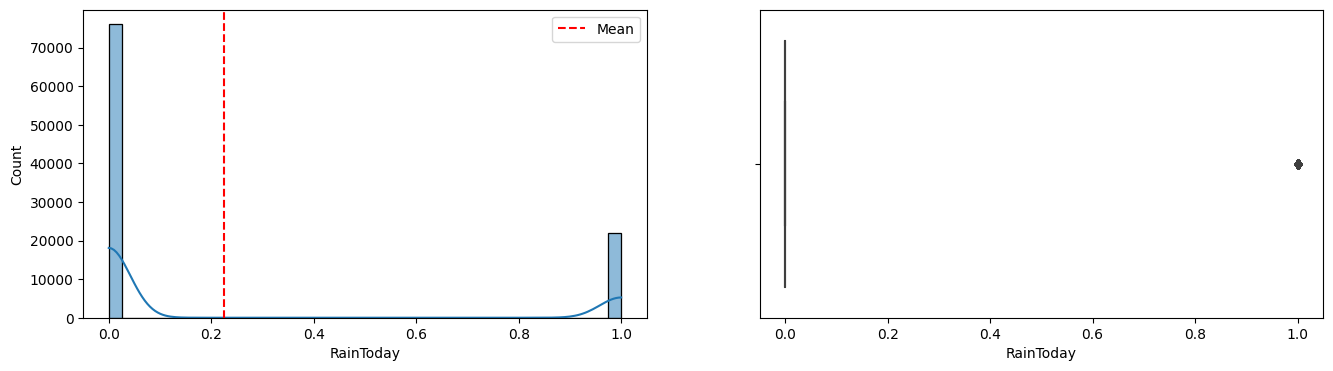

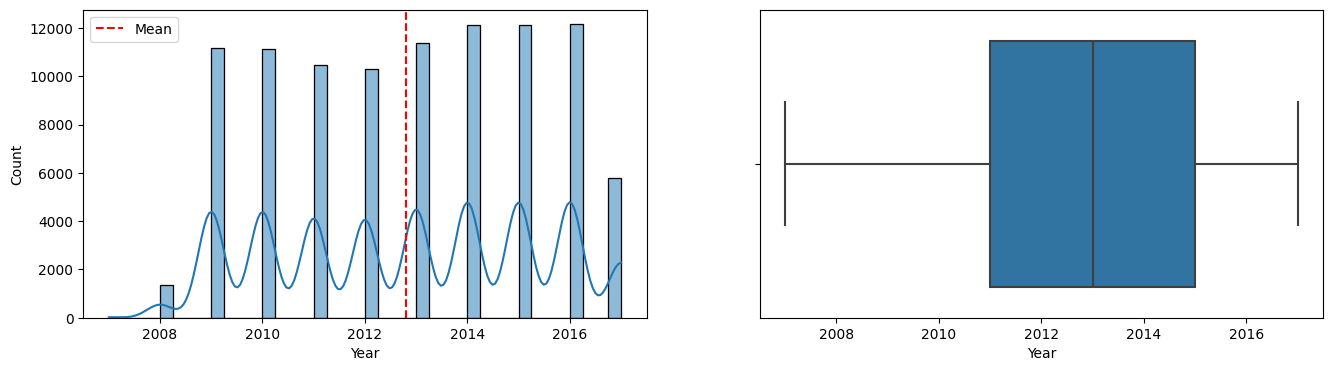

In [26]:
num_cols = X_train._get_numeric_data()

for col in num_cols:
    fig, axs = plt.subplots(1,2, figsize=(16,4))
    sns.histplot(num_cols[col], bins=40, kde=True, ax=axs[0])
    sns.boxplot(x=num_cols[col], ax= axs[1])

    axs[0].axvline(num_cols[col].mean(), color='red', linestyle='dashed', label = 'Mean')
    axs[0].legend()

Here there features showed different distribution of outliers. In this analysis I will handle normally distributed features using Z-score and the rest with Windsorizer

### Handling Outliers On Train Set: Z-Score

In [27]:
# define columns with normal distribution
z_list = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']

def handle_outliers_zscore(X_train, y_train, z_list, threshold=3):

    # Copy the original DataFrames to avoid modifying the original data
    X_train_z = X_train.copy()
    y_train_out = y_train.copy()
    
    # Calculate the z-score for the specified columns in X_train
    z_score = (X_train_z[z_list] - X_train_z[z_list].mean()) / X_train_z[z_list].std()
    
    # Find the rows in X_train that have any z-score beyond the threshold
    outlier_mask = (z_score.abs() > threshold).any(axis=1)
    
    # Delete the corresponding rows in y_train
    y_train_out = y_train_out.loc[~outlier_mask]
    
    # Delete the corresponding rows in X_train_z
    X_train_z.drop(X_train_z[outlier_mask].index, inplace=True)
    
    return X_train_z, y_train_out

In [28]:
# implement to X_train
X_train, y_train = handle_outliers_zscore(X_train,y_train, z_list, threshold=3)

### Handling Outliers on Train Set: Windsorizer

In [29]:
non_outlier = ['RainToday', 'Year'] #low variety
wind_list = [i for i in num_cols.columns if i not in (z_list and non_outlier) ]
wind_list

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [30]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=wind_list)

windsoriser.fit(X_train)

X_train = windsoriser.transform(X_train)

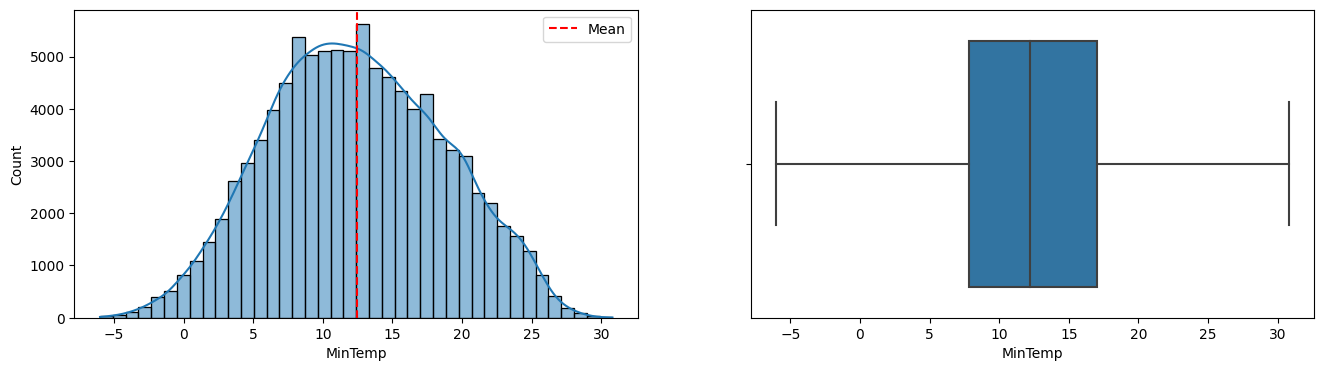

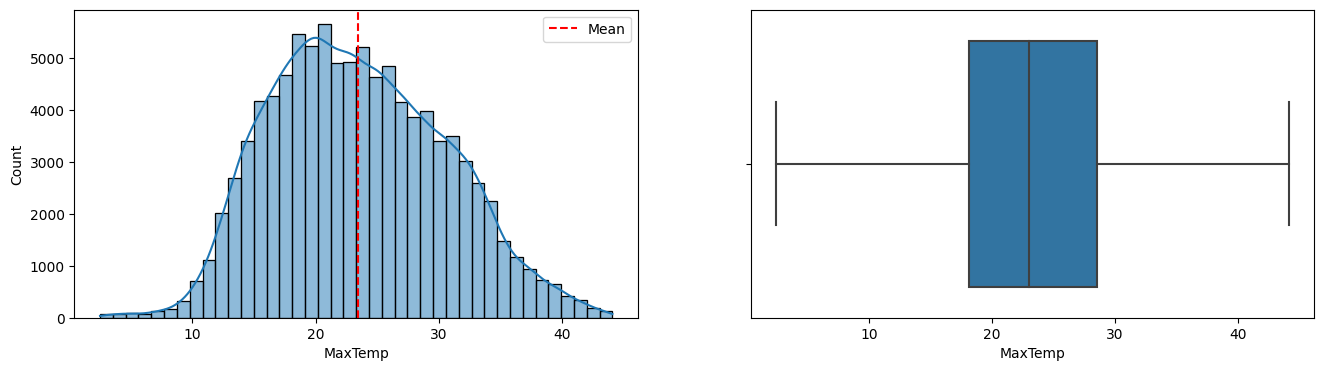

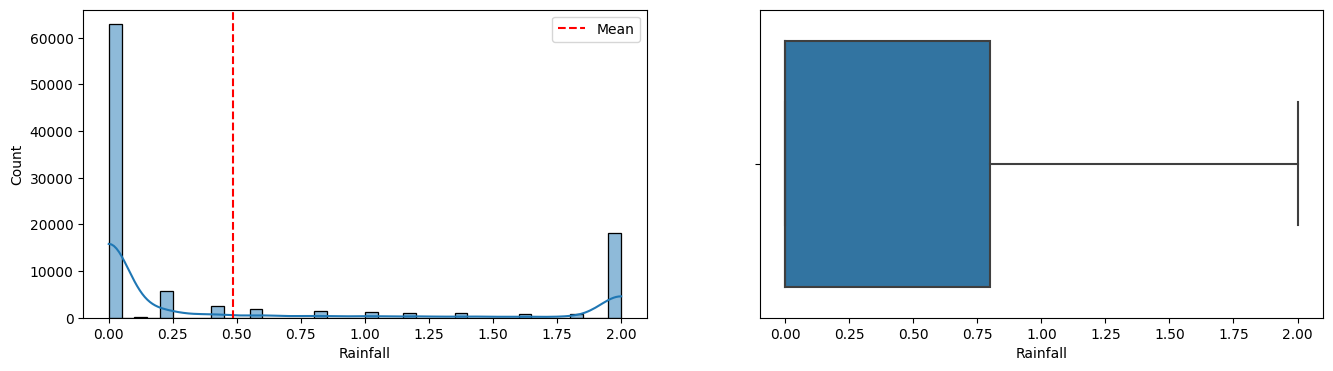

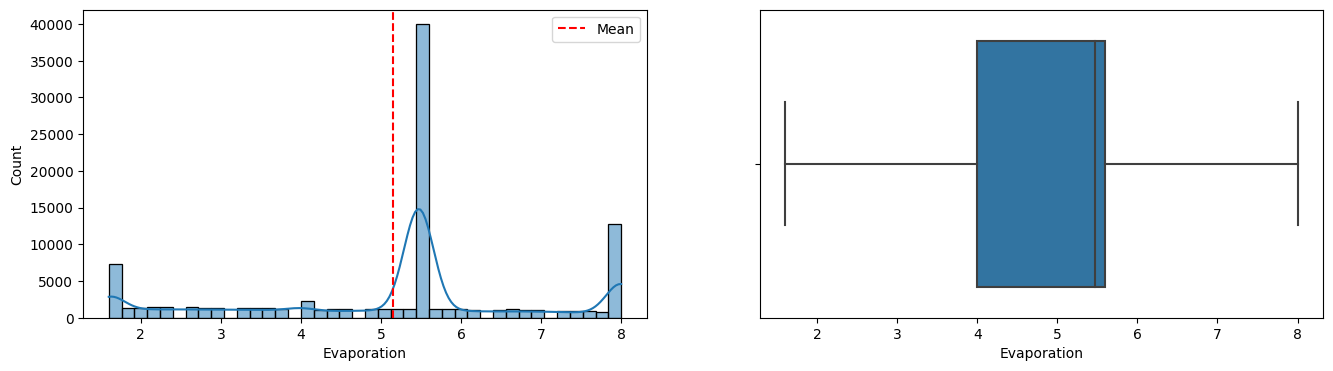

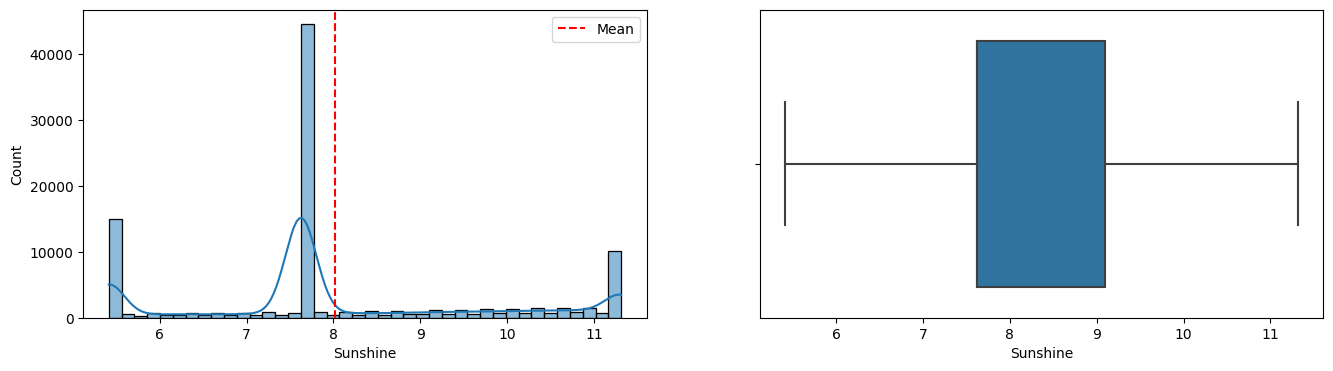

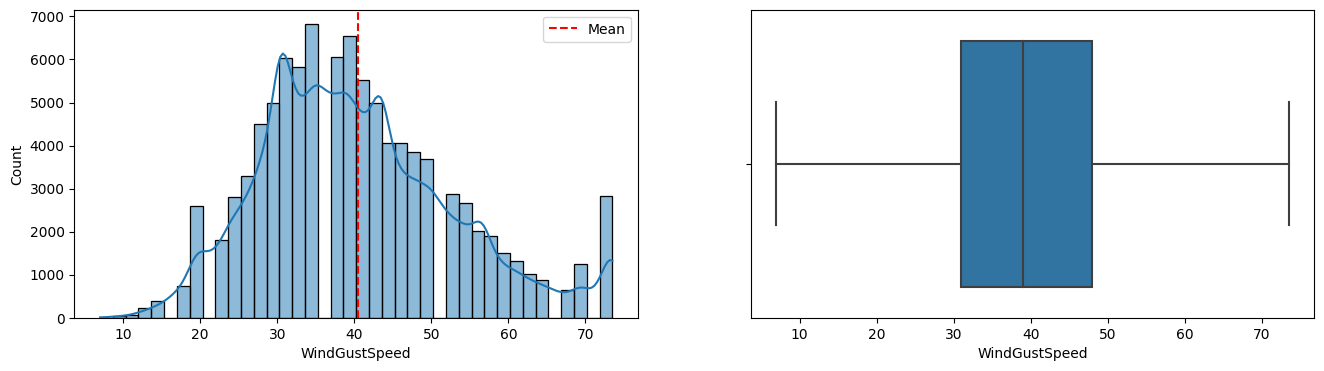

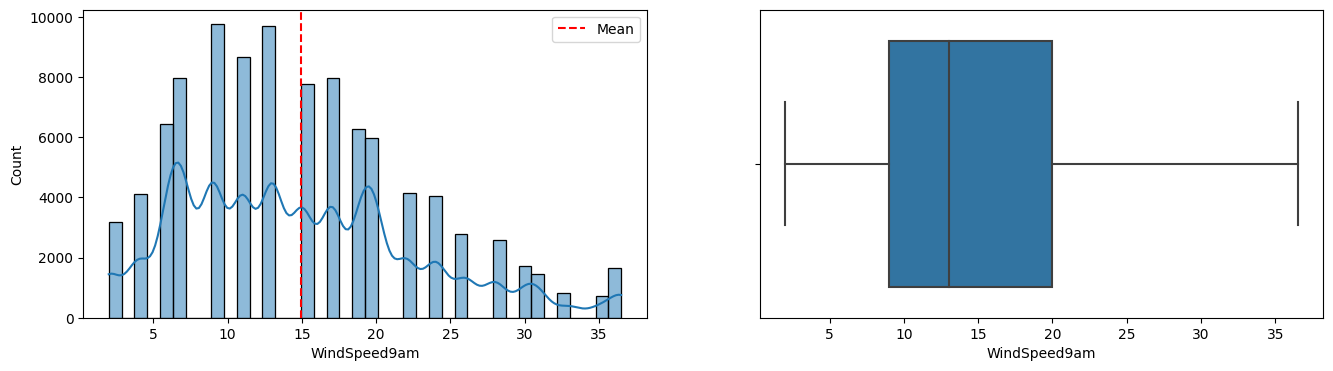

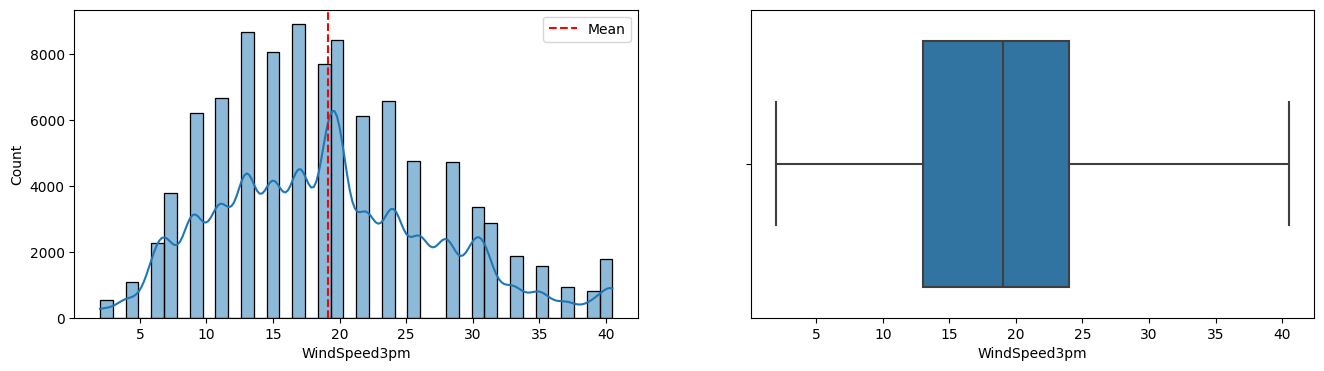

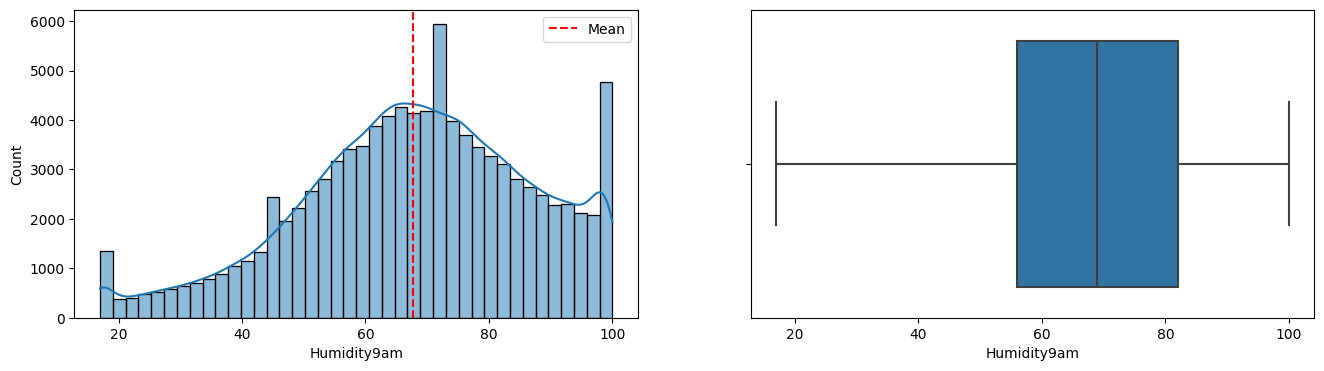

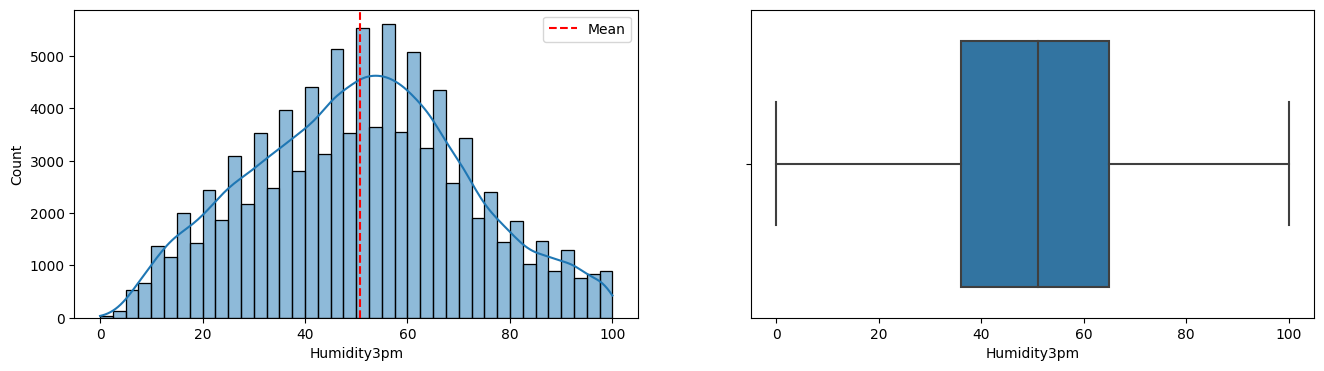

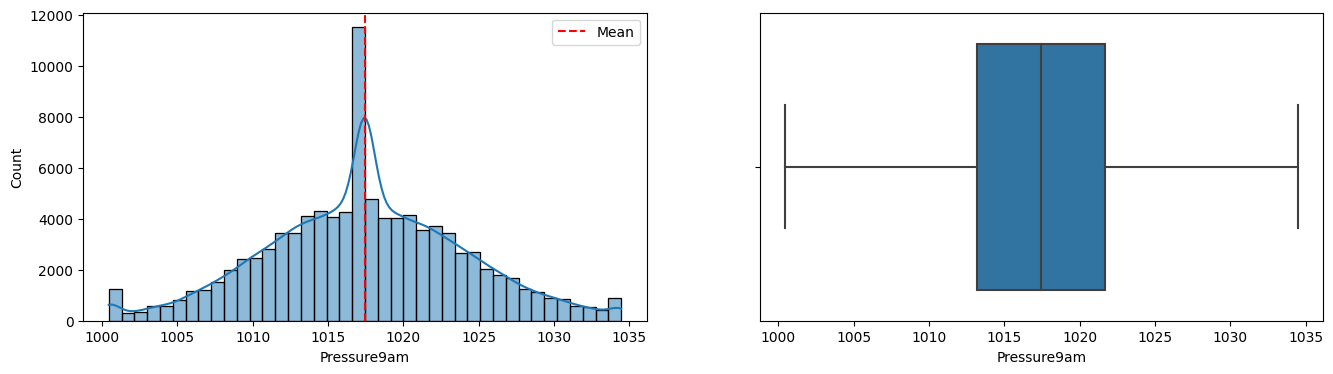

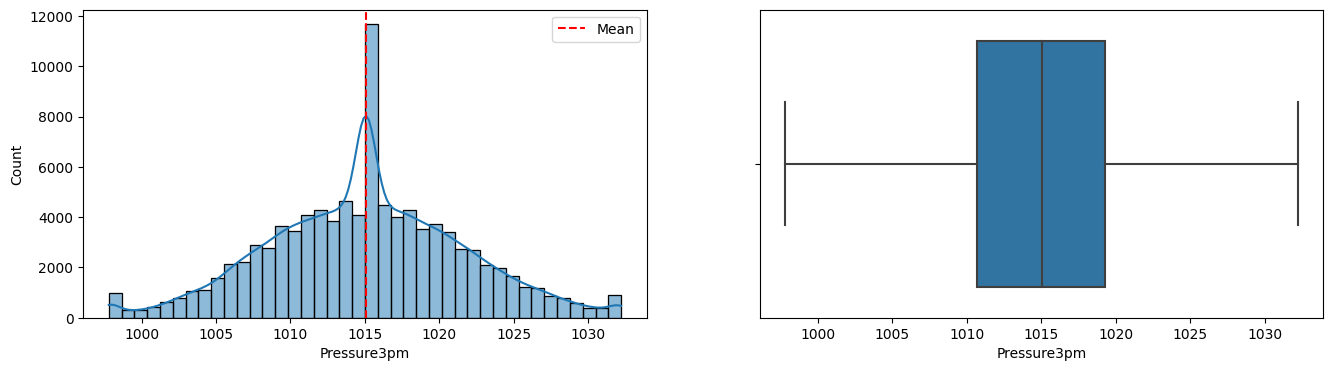

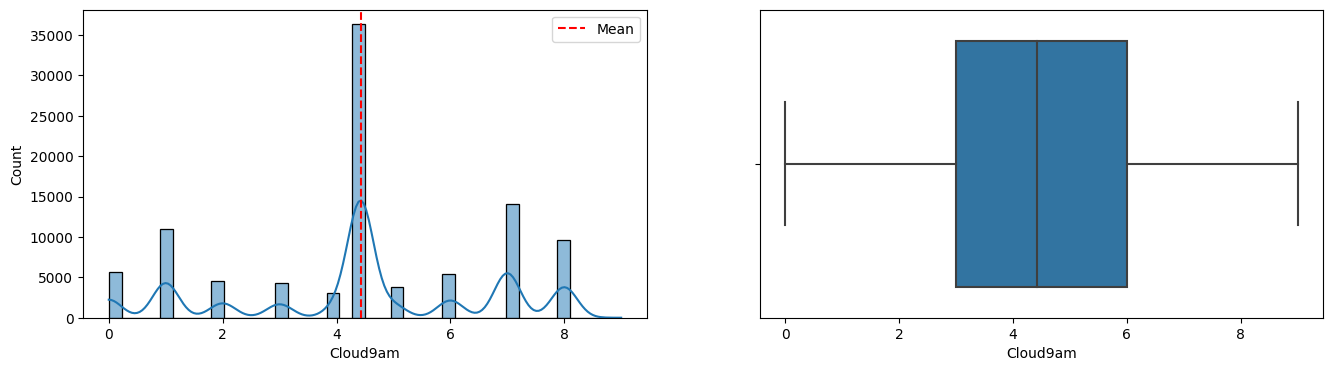

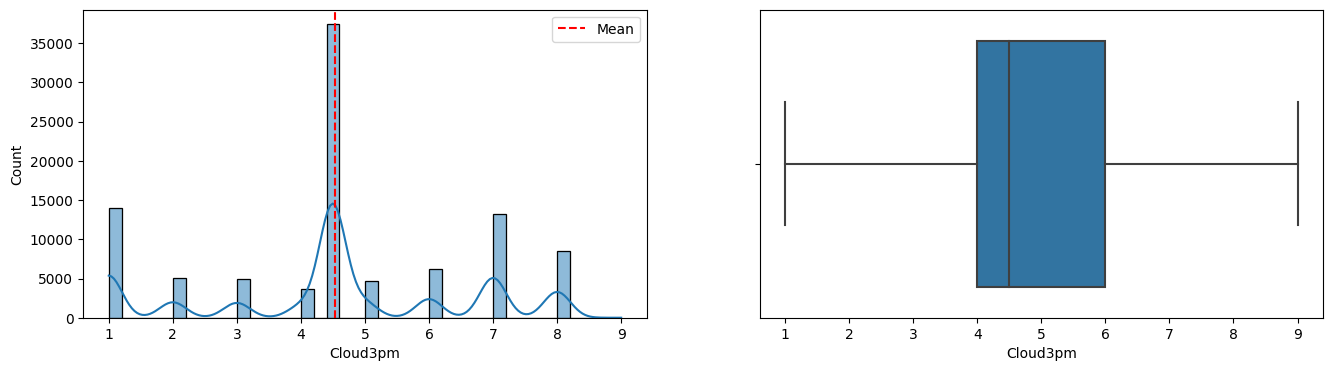

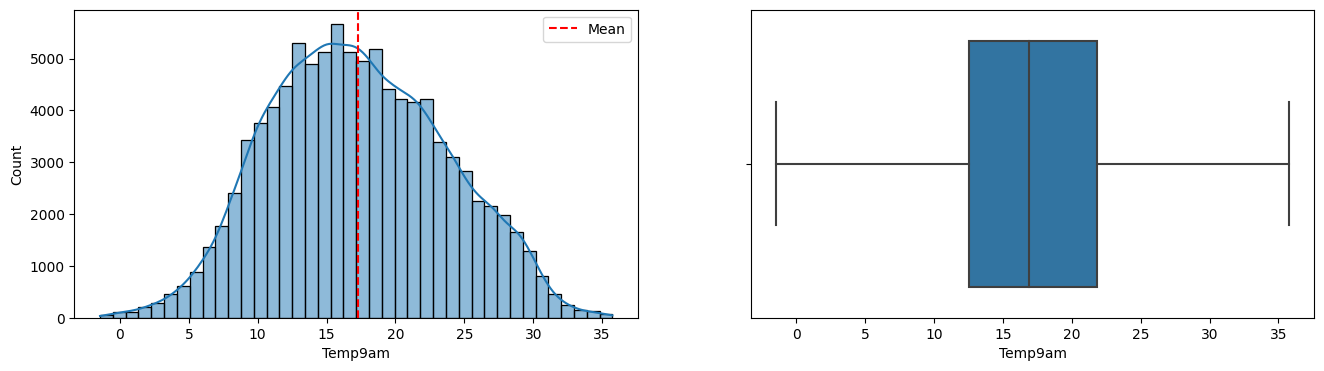

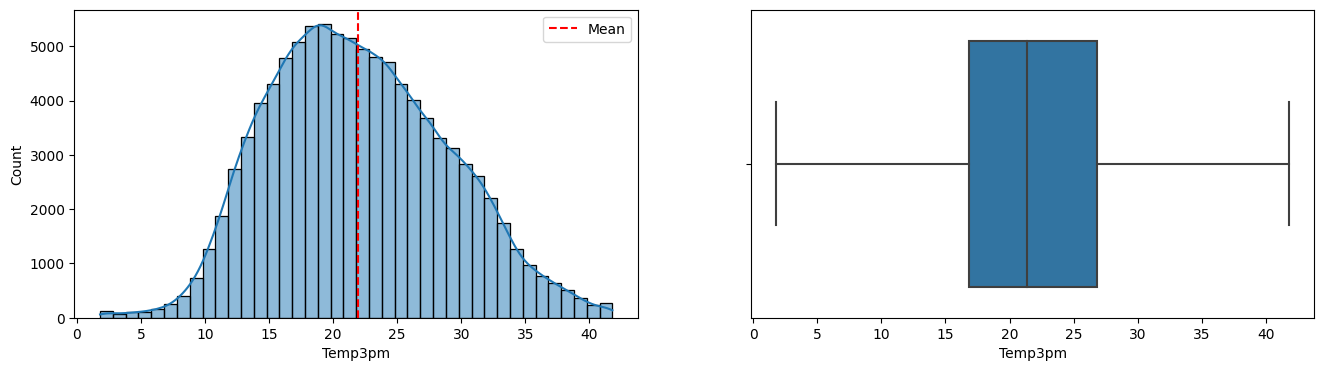

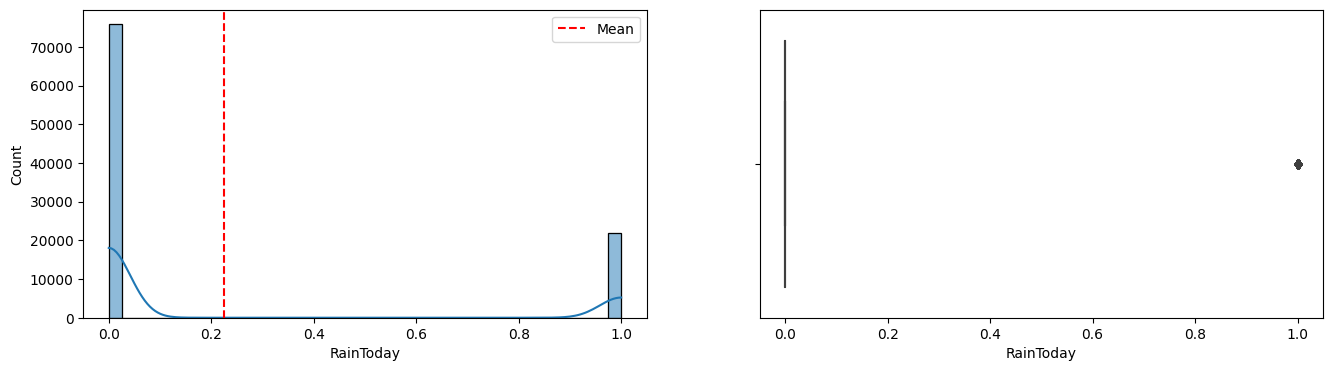

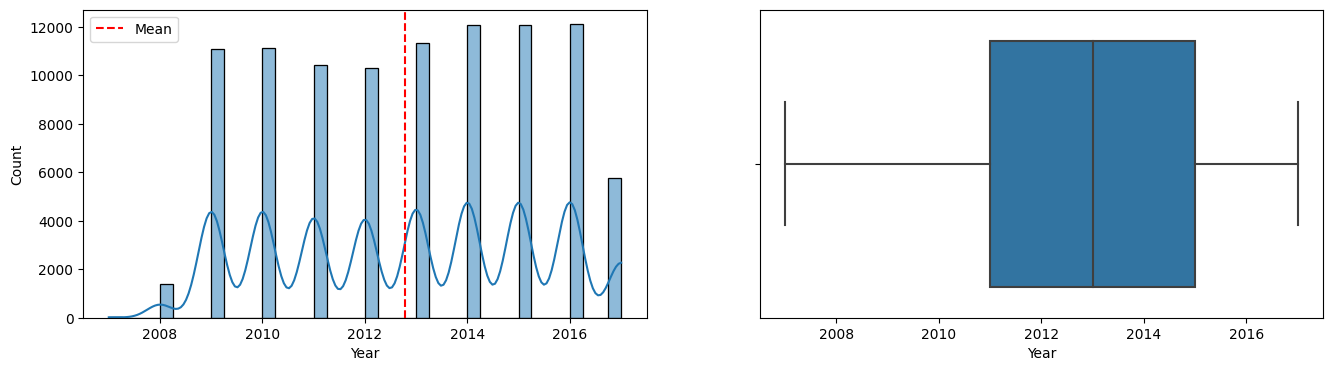

In [31]:
new_num_cols = X_train._get_numeric_data()

# recheck outliers
for col in new_num_cols:
    fig, axs = plt.subplots(1,2, figsize=(16,4))
    sns.histplot(new_num_cols[col], bins=40, kde=True, ax=axs[0])
    sns.boxplot(x= new_num_cols[col], ax= axs[1])

    axs[0].axvline(new_num_cols[col].mean(), color='red', linestyle='dashed', label = 'Mean')
    axs[0].legend()

### Feature Selection

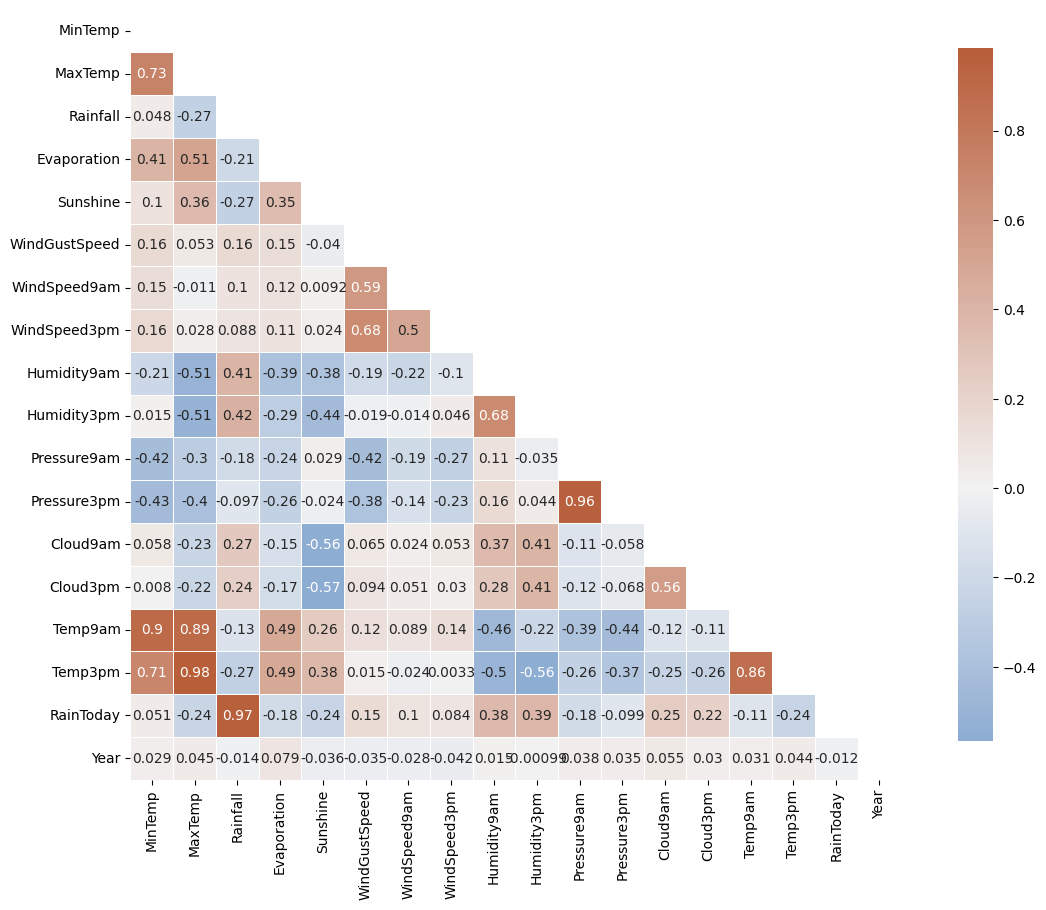

In [32]:
corr = X_train.corr()
mask = np.triu(np.ones_like(corr))
f, ax = plt.subplots(figsize=(15,10))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

List of features with high dependency:
- RainToday - RainFall (97%)
- Temp3pm - MaxTemp (98%)
- Temp3pm - Temp9am(87%)
- Temp9am - MinTemp (90%)
- Temp3pm - MaxTemp(89%)
- Pressure3pm - Pressure9am(96%)

Hence here are the the features I will drop:
- Rainfall : It will be easier for the user to get the information whether or not today is raining instead of knowing the the amount of rainfall recorded for the day in mm
- Temp9am : Already represented by MinTemp
- Temp3pm : Already represented by MaxTemp
- Pressure9am
- Location
- Date
- Year

In [33]:
X_train_new = X_train.drop(['Location' ,'Rainfall', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Date', 'Year'], axis=1)
X_test = X_test.drop(['Location', 'Rainfall', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Date', 'Year'], axis=1)

In [34]:
X_train_new.columns.to_list()

['MinTemp',
 'MaxTemp',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'RainToday']

In [35]:
X_train_new.head()


,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday
33349,19.9,26.5,3.800000,5.413410,E,35.0,ESE,E,15.0,22.0,86.0,57.0,1017.5,7.000000,6.00000,1
84209,18.7,28.9,7.600000,9.000000,ENE,31.0,SE,ENE,13.0,15.0,49.0,50.0,1016.7,7.000000,7.00000,0
113875,13.2,17.5,5.471953,7.625364,SSE,41.0,S,SSE,13.0,24.0,80.0,76.0,1019.7,4.426357,4.49683,1
7699,14.1,33.7,8.000000,7.625364,W,46.0,N,W,13.0,26.0,17.0,4.0,1008.3,4.426357,4.49683,0
101958,15.8,34.0,7.200000,8.000000,W,52.0,N,WSW,28.0,26.0,24.0,32.0,1013.8,7.000000,7.00000,0


In [36]:
# redefine numerical and categorical columns
cat_cols = ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
num_cols = [i for i in X_train_new.columns if i not in cat_cols]

In [37]:
# train set
X_train_num = X_train_new[num_cols]
X_train_cat = X_train_new[cat_cols]

# test set
X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

### Scaling Numerical Data

In [38]:
# Feature Scalling using MniMaxScaller
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [39]:
X_train_num_scaled.shape

(97743, 12)

### Handling Imbalance Data: SMOTENC

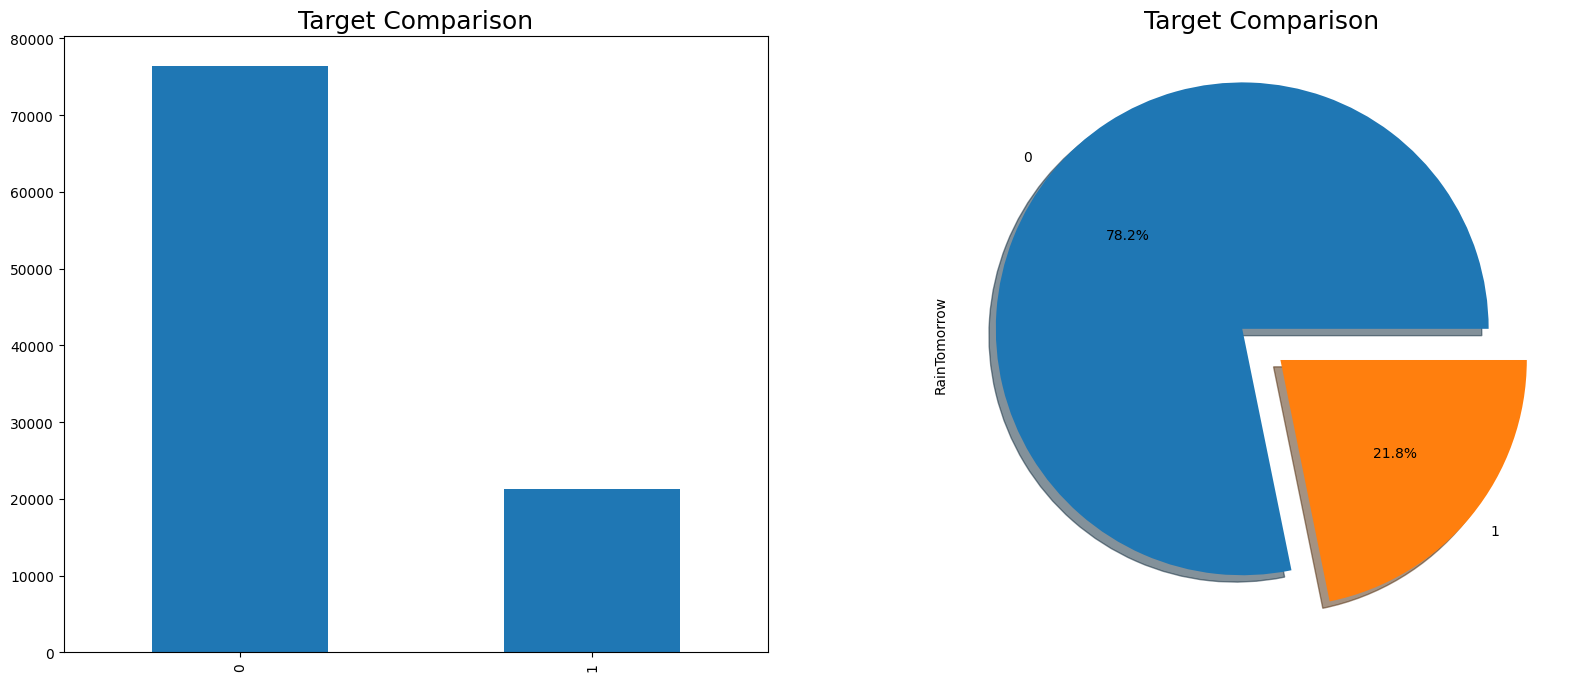

In [40]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 8))

y_train.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,ax=axarr[1])
axarr[1].set_title("Target Comparison", fontsize=18)

y_train.value_counts().plot(kind='bar',ax=axarr[0])
axarr[0].set_title("Target Comparison", fontsize=18)
plt.show()

In [135]:
# Handle numerical col
smotenc_num = pd.DataFrame(X_train_num_scaled, columns=num_cols)
smotenc_num.head()


,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm
0,0.703804,0.576923,0.343750,0.000000,0.421053,0.376812,0.519481,0.831325,0.57,0.572674,0.777778,0.625000
1,0.671196,0.634615,0.937500,0.608047,0.360902,0.318841,0.337662,0.385542,0.50,0.549419,0.777778,0.750000
2,0.521739,0.360577,0.604993,0.375000,0.511278,0.318841,0.571429,0.759036,0.76,0.636628,0.491817,0.437104
3,0.546196,0.750000,1.000000,0.375000,0.586466,0.318841,0.623377,0.000000,0.04,0.305233,0.491817,0.437104
4,0.592391,0.757212,0.875000,0.438513,0.676692,0.753623,0.623377,0.084337,0.32,0.465116,0.777778,0.750000


In [136]:
# categorical col
smotenc_cat = X_train_cat.reset_index().drop('index', axis=1)
smotenc_cat.head()

,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,1,E,ESE,E
1,0,ENE,SE,ENE
2,1,SSE,S,SSE
3,0,W,N,W
4,0,W,N,WSW


In [137]:
X_train_sm = pd.concat([smotenc_num, smotenc_cat], axis=1)
X_train_sm.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,0.703804,0.576923,0.343750,0.000000,0.421053,0.376812,0.519481,0.831325,0.57,0.572674,0.777778,0.625000,1,E,ESE,E
1,0.671196,0.634615,0.937500,0.608047,0.360902,0.318841,0.337662,0.385542,0.50,0.549419,0.777778,0.750000,0,ENE,SE,ENE
2,0.521739,0.360577,0.604993,0.375000,0.511278,0.318841,0.571429,0.759036,0.76,0.636628,0.491817,0.437104,1,SSE,S,SSE
3,0.546196,0.750000,1.000000,0.375000,0.586466,0.318841,0.623377,0.000000,0.04,0.305233,0.491817,0.437104,0,W,N,W
4,0.592391,0.757212,0.875000,0.438513,0.676692,0.753623,0.623377,0.084337,0.32,0.465116,0.777778,0.750000,0,W,N,WSW


In [138]:
# Identify categorical indices
categorical_indices = [X_train_sm.columns.get_loc(col) for col in cat_cols]

# Check that all categorical indices are within range
max_index = len(X_train_sm.columns) - 1
if any(index < 0 or index > max_index for index in categorical_indices):
    raise ValueError('Some of the categorical indices are out of range.')

In [139]:
# Define SMOTENC
sm = SMOTENC(categorical_features= categorical_indices, random_state=42)

# Fit to X_train
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_sm, y_train)
X_train_num_new = X_train_balanced[num_cols]

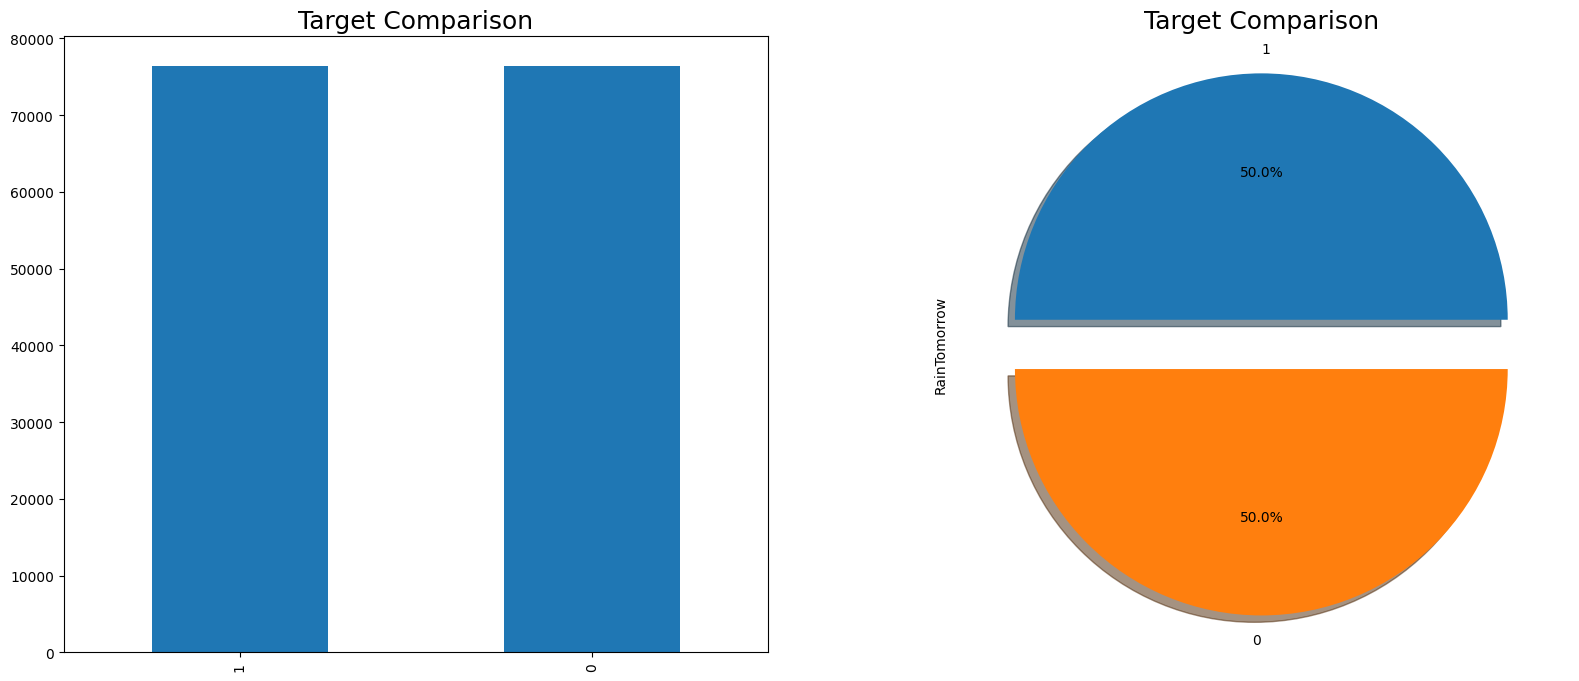

In [46]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 8))

y_train_balanced.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,ax=axarr[1])
axarr[1].set_title("Target Comparison", fontsize=18)

y_train_balanced.value_counts().plot(kind='bar',ax=axarr[0])
axarr[0].set_title("Target Comparison", fontsize=18)
plt.show()

### Encode Categorical Data

In [157]:
X_train_balanced_cat = X_train_balanced[cat_cols]
ohe = OneHotEncoder(handle_unknown= 'ignore',sparse=False)
ohe.fit(X_train_cat)

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [158]:
# Assign to Train-set and Test-set
X_train_cat_encoded = ohe.transform(X_train_balanced_cat)
X_test_cat_encoded = ohe.transform(X_test_cat)

In [49]:
# Concatenate all arrays into a single 1D array
features_label = np.concatenate(ohe.categories_).tolist()

print(features_label)

[0, 1, 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW']


### Join Scaled and Encoded Data

In [82]:
# Join array for scaled and encoded features
X_train_final = np.concatenate([X_train_num_new, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_final_df = pd.DataFrame(X_train_final, y_train_balanced, columns=[num_cols + features_label])

## 6. Model Definition

In [51]:
# Logistic Regression
logreg = LogisticRegression(random_state=42)

# Decision Tree Classidier
dt_model = DecisionTreeClassifier(random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Naive Bayes
gnb = GaussianNB()

## 7. Model Training

In [52]:
# Logistic Regression
logreg.fit(X_train_final, y_train_balanced)
lr_train = logreg.predict(X_train_final)
lr_test = logreg.predict(X_test_final)

# Random Forest Classifier
rf_model.fit(X_train_final, y_train_balanced)
rf_train = rf_model.predict(X_train_final)
rf_test = rf_model.predict(X_test_final)

# Decision Tree Classifier
dt_model.fit(X_train_final, y_train_balanced)
dt_train = dt_model.predict(X_train_final)
dt_test = dt_model.predict(X_test_final)

# KNN
knn.fit(X_train_final, y_train_balanced)
knn_train = knn.predict(X_train_final)
knn_test = knn.predict(X_test_final)

# Naive Bayes
gnb.fit(X_train_final, y_train_balanced)
gnb_train = gnb.predict(X_train_final)
gnb_test = gnb.predict(X_test_final)

## 8. Model Evaluation

### Logistic Regression

Evaluation: Logistic Regression
Training score: 0.7941
Test score: 0.7818
              precision    recall  f1-score   support

           0       0.79      0.80      0.79     76437
           1       0.80      0.79      0.79     76437

    accuracy                           0.79    152874
   macro avg       0.79      0.79      0.79    152874
weighted avg       0.79      0.79      0.79    152874

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     19042
           1       0.51      0.79      0.62      5472

    accuracy                           0.78     24514
   macro avg       0.72      0.78      0.73     24514
weighted avg       0.83      0.78      0.80     24514

Confusion Matrix: 


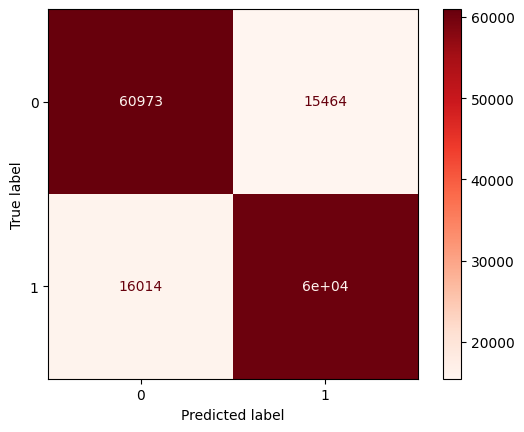

In [53]:
# Logistic Regression
print('Evaluation: Logistic Regression')
print('Training score: {:.4f}'.format(logreg.score(X_train_final, y_train_balanced)))
print('Test score: {:.4f}'.format(logreg.score(X_test_final, y_test)))

# Classification Report
print(classification_report(y_train_balanced, lr_train))
print(classification_report(y_test, lr_test))

# Confusion Matrix
print('Confusion Matrix: \n', ConfusionMatrixDisplay.from_estimator(logreg, X_train_final, y_train_balanced, cmap='Reds'))

### Random Forest Classifier

Evaluation: Random Forest Classifier
Training score: 1.0000
Test score: 0.8425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76437
           1       1.00      1.00      1.00     76437

    accuracy                           1.00    152874
   macro avg       1.00      1.00      1.00    152874
weighted avg       1.00      1.00      1.00    152874

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     19042
           1       0.64      0.68      0.66      5472

    accuracy                           0.84     24514
   macro avg       0.77      0.78      0.78     24514
weighted avg       0.85      0.84      0.84     24514

Confusion Matrix: 


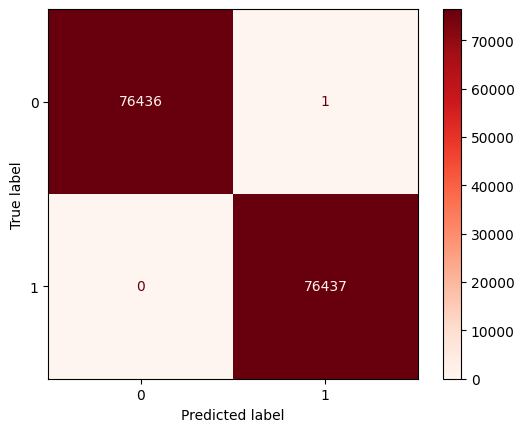

In [55]:
# Random Forest Classifier
print('Evaluation: Random Forest Classifier')
print('Training score: {:.4f}'.format(rf_model.score(X_train_final, y_train_balanced)))
print('Test score: {:.4f}'.format(rf_model.score(X_test_final, y_test)))

# Classification Report
print(classification_report(y_train_balanced, rf_train))
print(classification_report(y_test, rf_test))

# Confusion Matrix
print('Confusion Matrix: \n', ConfusionMatrixDisplay.from_estimator(rf_model, X_train_final, y_train_balanced, cmap='Reds'))

### Decision Tree Classifier

Evaluation: Decision Tree Classifier
Training score: 1.0000
Test score: 0.7775
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76437
           1       1.00      1.00      1.00     76437

    accuracy                           1.00    152874
   macro avg       1.00      1.00      1.00    152874
weighted avg       1.00      1.00      1.00    152874

              precision    recall  f1-score   support

           0       0.88      0.83      0.85     19042
           1       0.50      0.59      0.54      5472

    accuracy                           0.78     24514
   macro avg       0.69      0.71      0.70     24514
weighted avg       0.79      0.78      0.78     24514

Confusion Matrix: 


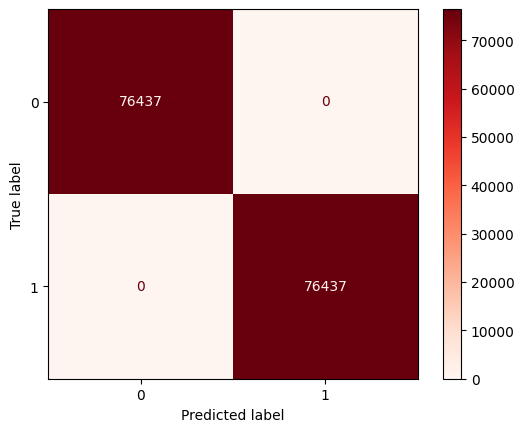

In [56]:
# Decision Tree Classifier
print('Evaluation: Decision Tree Classifier')
print('Training score: {:.4f}'.format(dt_model.score(X_train_final, y_train_balanced)))
print('Test score: {:.4f}'.format(dt_model.score(X_test_final, y_test)))

print(classification_report(y_train_balanced, dt_train))
print(classification_report(y_test, dt_test))


# Confusion Matrix
print('Confusion Matrix: \n', ConfusionMatrixDisplay.from_estimator(dt_model, X_train_final, y_train_balanced, cmap='Reds'))

### KNN

KNN
Training score: 0.8876
Test score: 0.7365
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     76437
           1       0.87      0.91      0.89     76437

    accuracy                           0.89    152874
   macro avg       0.89      0.89      0.89    152874
weighted avg       0.89      0.89      0.89    152874

              precision    recall  f1-score   support

           0       0.89      0.76      0.82     19042
           1       0.44      0.66      0.53      5472

    accuracy                           0.74     24514
   macro avg       0.66      0.71      0.67     24514
weighted avg       0.79      0.74      0.75     24514

Confusion Matrix: 


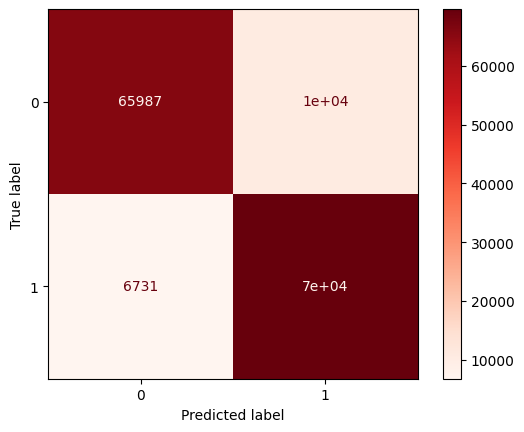

In [57]:
# KNN
print('KNN')
print('Training score: {:.4f}'.format(knn.score(X_train_final, y_train_balanced)))
print('Test score: {:.4f}'.format(knn.score(X_test_final, y_test)))

# Classification Report
print(classification_report(y_train_balanced, knn_train))
print(classification_report(y_test, knn_test))

# Confusion Matrix
print('Confusion Matrix: \n', ConfusionMatrixDisplay.from_estimator(knn, X_train_final, y_train_balanced, cmap='Reds'))

### Naive Bayes

Naive Bayes
Training score: 0.7056
Test score: 0.6939
              precision    recall  f1-score   support

           0       0.72      0.68      0.70     76437
           1       0.70      0.73      0.71     76437

    accuracy                           0.71    152874
   macro avg       0.71      0.71      0.71    152874
weighted avg       0.71      0.71      0.71    152874

              precision    recall  f1-score   support

           0       0.89      0.69      0.78     19042
           1       0.39      0.70      0.50      5472

    accuracy                           0.69     24514
   macro avg       0.64      0.69      0.64     24514
weighted avg       0.78      0.69      0.72     24514

Confusion Matrix: 


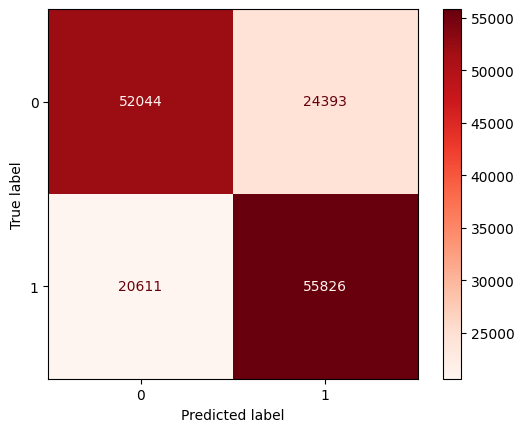

In [58]:
# Naive Bayes
print('Naive Bayes')
print('Training score: {:.4f}'.format(gnb.score(X_train_final, y_train_balanced)))
print('Test score: {:.4f}'.format(gnb.score(X_test_final, y_test)))

# Classification Report
print(classification_report(y_train_balanced, gnb_train))
print(classification_report(y_test, gnb_test))

# Confusion Matrix
print('Confusion Matrix: \n', ConfusionMatrixDisplay.from_estimator(gnb, X_train_final, y_train_balanced, cmap='Reds'))

## 9. Cross Validation

### Logistic Regression

In [59]:
cv_logrec = cross_val_score(logreg,X_train_final, y_train_balanced, cv=10, scoring='accuracy')

print('LogisticRegression')
print('accuracy Score - All - Cross Validation  : ', cv_logrec)
print('accuracy Score - Mean - Cross Validation : ', cv_logrec.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_logrec.std())
print('accuracy Score - Range of Test-Set       : ', (cv_logrec.mean()-cv_logrec.std()) , '-', (cv_logrec.mean()+cv_logrec.std()))

LogisticRegression
accuracy Score - All - Cross Validation  :  [0.78963893 0.7894427  0.78878859 0.79362899 0.79047557 0.79629751
 0.7979983  0.79852162 0.79590502 0.79708249]
accuracy Score - Mean - Cross Validation :  0.7937779714841691
accuracy Score - Std - Cross Validation  :  0.003658603229999988
accuracy Score - Range of Test-Set       :  0.7901193682541691 - 0.7974365747141691


### Random Forest Classifier

In [61]:
cv_rf = cross_val_score(rf_model,X_train_final, y_train_balanced, cv=10, scoring='accuracy')

print('DecissionTree')
print('accuracy Score - All - Cross Validation  : ', cv_rf)
print('accuracy Score - Mean - Cross Validation : ', cv_rf.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_rf.std())
print('accuracy Score - Range of Test-Set       : ', (cv_rf.mean()-cv_rf.std()) , '-', (cv_rf.mean()+cv_rf.std()))

DecissionTree
accuracy Score - All - Cross Validation  :  [0.83895866 0.83725798 0.85419937 0.91398482 0.91345588 0.91999738
 0.91777327 0.91698829 0.9165958  0.91855825]
accuracy Score - Mean - Cross Validation :  0.8947769712773124
accuracy Score - Std - Cross Validation  :  0.03389447631099146
accuracy Score - Range of Test-Set       :  0.860882494966321 - 0.9286714475883038


### Decision Tree Classifier

In [62]:
cv_dt = cross_val_score(dt_model,X_train_final, y_train_balanced, cv=10, scoring='accuracy')

print('DecissionTree')
print('accuracy Score - All - Cross Validation  : ', cv_dt)
print('accuracy Score - Mean - Cross Validation : ', cv_dt.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_dt.std())
print('accuracy Score - Range of Test-Set       : ', (cv_dt.mean()-cv_dt.std()) , '-', (cv_dt.mean()+cv_dt.std()))

DecissionTree
accuracy Score - All - Cross Validation  :  [0.73868394 0.72422815 0.76602564 0.86525379 0.85726434 0.86262838
 0.86452541 0.86308628 0.85988094 0.86740368]
accuracy Score - Mean - Cross Validation :  0.8268980559199139
accuracy Score - Std - Cross Validation  :  0.05581415847526178
accuracy Score - Range of Test-Set       :  0.7710838974446521 - 0.8827122143951758


### KNN

In [63]:
cv_knn = cross_val_score(knn,X_train_final, y_train_balanced, cv=10, scoring='accuracy')

print('DecissionTree')
print('accuracy Score - All - Cross Validation  : ', cv_knn)
print('accuracy Score - Mean - Cross Validation : ', cv_knn.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_knn.std())
print('accuracy Score - Range of Test-Set       : ', (cv_knn.mean()-cv_knn.std()) , '-', (cv_knn.mean()+cv_knn.std()))

DecissionTree
accuracy Score - All - Cross Validation  :  [0.74045003 0.73940345 0.75019623 0.80030089 0.79956826 0.80525937
 0.80238111 0.81042716 0.8027736  0.81029633]
accuracy Score - Mean - Cross Validation :  0.786105643026089
accuracy Score - Std - Cross Validation  :  0.02832678070539465
accuracy Score - Range of Test-Set       :  0.7577788623206944 - 0.8144324237314836


### Naive Bayes

In [64]:
cv_gnb = cross_val_score(gnb,X_train_final, y_train_balanced, cv=10, scoring='accuracy')

print('DecissionTree')
print('accuracy Score - All - Cross Validation  : ', cv_gnb)
print('accuracy Score - Mean - Cross Validation : ', cv_gnb.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_gnb.std())
print('accuracy Score - Range of Test-Set       : ', (cv_gnb.mean()-cv_gnb.std()) , '-', (cv_gnb.mean()+cv_gnb.std()))

DecissionTree
accuracy Score - All - Cross Validation  :  [0.69368132 0.69459707 0.69381214 0.70499738 0.71191208 0.70399686
 0.71897691 0.71138876 0.7111271  0.70994963]
accuracy Score - Mean - Cross Validation :  0.7054439256367365
accuracy Score - Std - Cross Validation  :  0.008405502070555149
accuracy Score - Range of Test-Set       :  0.6970384235661814 - 0.7138494277072917


### Cross Validation Recap

In [65]:
crossval = [cv_logrec, cv_rf, cv_dt, cv_knn, cv_gnb]
mean = []
std = []
for i in crossval:
    mean.append(i.mean())
    std.append(i.std())
model = ['Logistic Regression',  'Random Forest', 'Decision Tree', 'KNN', 'Naive Bayes']
bestmodel = pd.DataFrame(model)
bestmodel['Mean']=np.round(mean,3)
bestmodel['Std']=np.round(std,3)
bestmodel.rename(columns={0:'Model'},inplace = True)
bestmodel.sort_values(by= 'Mean' , ascending = False).reset_index(drop=True)

,Model,Mean,Std
0,Random Forest,0.895,0.034
1,Decision Tree,0.827,0.056
2,Logistic Regression,0.794,0.004
3,KNN,0.786,0.028
4,Naive Bayes,0.705,0.008


In [66]:
# Save Classification Report For SVC into a Dictionary
all_reports_rfc = {}
score_reports_rfc = {
    'train - precision' : precision_score(y_train_balanced, rf_train),
    'train - recall' : recall_score(y_train_balanced, rf_train),
    'train - accuracy' : accuracy_score(y_train_balanced, rf_train),
    'train - f1_score' : f1_score(y_train_balanced, rf_train),
    'test - precision' : precision_score(y_test, rf_test),
    'test - recall' : recall_score(y_test, rf_test),
    'test - accuracy_score' : accuracy_score(y_test, rf_test),
    'test - f1_score' : f1_score(y_test, rf_test),
}
all_reports_rfc['Baseline RFC (Default Hyperparameter)'] = score_reports_rfc
pd.DataFrame(all_reports_rfc)

,Baseline RFC (Default Hyperparameter)
test - accuracy_score,0.842457
test - f1_score,0.657016
test - precision,0.639081
test - recall,0.675987
train - accuracy,0.999993
train - f1_score,0.999993
train - precision,0.999987
train - recall,1.000000


## 10. Hyperparameter tuning

### Random Search

In [67]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [68]:
criterion= ["gini", "entropy"]
max_features= ["sqrt", "log2", None]
min_samples_split= [2, 5, 10]
n_estimators= [100, 150, 300]
max_depth= [5, 10, None]
random_grid = {
               'criterion': criterion,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'n_estimators': n_estimators,
               'max_depth': max_depth
}
random_grid


{'criterion': ['gini', 'entropy'],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 150, 300],
 'max_depth': [5, 10, None]}

In [69]:

# Train with Random Search
rfc_randomcv = RandomizedSearchCV(estimator=rf_model, 
                                 param_distributions=random_grid,
                                 n_iter=5,
                                 cv=5, 
                                 random_state=42, 
                                 n_jobs=-1, 
                                 scoring='accuracy')
rfc_randomcv.fit(X_train_final, y_train_balanced)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 300]},
                   random_state=42, scoring='accuracy')

In [70]:
# Get Best Hyperparameters
rfc_randomcv.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'gini'}

In [71]:
# Get Best Estimator
rfc_randomcv_best = rfc_randomcv.best_estimator_

Accuracy Score - Test Set   :  0.8422534062168556 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     19042
           1       0.64      0.68      0.66      5472

    accuracy                           0.84     24514
   macro avg       0.77      0.78      0.78     24514
weighted avg       0.85      0.84      0.84     24514
 

Confusion Matrix      : 


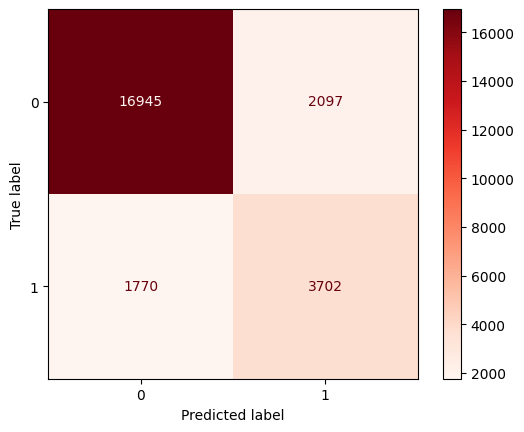

In [73]:
# Check Performance Model against Test-Set
y_pred_test = rfc_randomcv_best.predict(X_test_final)

print('Accuracy Score - Test Set   : ', accuracy_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rfc_randomcv_best, X_test_final, y_test, cmap='Reds'))

In [74]:
y_pred_train_rfc = rfc_randomcv_best.predict(X_train_final)
y_pred_test_rfc = rfc_randomcv_best.predict(X_test_final)

# Save Classification Report into a Dictionary
score_reports_rfc = {
    'train - precision' : precision_score(y_train_balanced, rf_train),
    'train - recall' : recall_score(y_train_balanced, rf_train),
    'train - accuracy' : accuracy_score(y_train_balanced, rf_train),
    'train - f1_score' : f1_score(y_train_balanced, rf_train),
    'test - precision' : precision_score(y_test, rf_test),
    'test - recall' : recall_score(y_test, rf_test),
    'test - accuracy_score' : accuracy_score(y_test, rf_test),
    'test - f1_score' : f1_score(y_test, rf_test),
}
all_reports_rfc['Random Search'] = score_reports_rfc
pd.DataFrame(all_reports_rfc)

,Baseline RFC (Default Hyperparameter),Random Search
train - precision,0.999987,0.999987
train - recall,1.000000,1.000000
train - accuracy,0.999993,0.999993
train - f1_score,0.999993,0.999993
test - precision,0.639081,0.639081
test - recall,0.675987,0.675987
test - accuracy_score,0.842457,0.842457
test - f1_score,0.657016,0.657016


## 11. Model Saving

In [165]:
# define your column transformer for scaling and one-hot encoding
preprocessor = ColumnTransformer(transformers=[
    ('num', scaler, num_cols),
    ('cat', ohe, cat_cols)
])

# define your main pipeline, including the nested pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smotenc', sm),
    ('classifier', rf_model)
])

# fit the pipeline to your data
pipeline.fit(X_train_new, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Evaporation', 'Sunshine',
                                                   'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure3pm', 'Cloud9am',
                                                   'Cloud3pm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False,
                                                                sparse_output=False),
                                                  ['RainToday', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm'])])),
                ('smotenc',
                 SMOTENC(categorical_features=[12, 13, 14, 15],
                         random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [166]:
# save model
# Saving pipeline as pipeline.pkl
with open ('pipeline.pkl', 'wb') as file_1:
    joblib.dump(pipeline, file_1)

with open('list_num_cols.txt', 'w') as file_2:
    json.dump(num_cols, file_2)

with open('list_cat_cols.txt', 'w') as file_3:
    json.dump(cat_cols, file_3)

In [195]:
input_path = 'pipeline.pkl'
output_path = 'compressed_pipeline.pkl'

In [196]:
cp.dump(pipeline, output_path, compression="lzma", set_default_extension=False)

## 12. Inference

In [170]:
new_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
0,2008-12-01,Albury,13.4,22.9,0.6,5.471953,7.625364,W,44.0,W,...,22.0,1007.7,1007.1,8.000000,4.49683,16.9,21.8,0,0,2008
1,2008-12-02,Albury,7.4,25.1,0.0,5.471953,7.625364,WNW,44.0,NNW,...,25.0,1010.6,1007.8,4.426357,4.49683,17.2,24.3,0,0,2008
2,2008-12-03,Albury,12.9,25.7,0.0,5.471953,7.625364,WSW,46.0,W,...,30.0,1007.6,1008.7,4.426357,2.00000,21.0,23.2,0,0,2008
3,2008-12-04,Albury,9.2,28.0,0.0,5.471953,7.625364,NE,24.0,SE,...,16.0,1017.6,1012.8,4.426357,4.49683,18.1,26.5,0,0,2008
4,2008-12-05,Albury,17.5,32.3,1.0,5.471953,7.625364,W,41.0,ENE,...,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,5.471953,7.625364,E,31.0,ESE,...,27.0,1024.7,1021.2,4.426357,4.49683,9.4,20.9,0,0,2017
145455,2017-06-21,Uluru,2.8,23.4,0.0,5.471953,7.625364,E,31.0,SE,...,24.0,1024.6,1020.3,4.426357,4.49683,10.1,22.4,0,0,2017
145456,2017-06-22,Uluru,3.6,25.3,0.0,5.471953,7.625364,NNW,22.0,SE,...,21.0,1023.5,1019.1,4.426357,4.49683,10.9,24.5,0,0,2017
145457,2017-06-23,Uluru,5.4,26.9,0.0,5.471953,7.625364,N,37.0,SE,...,24.0,1021.0,1016.8,4.426357,4.49683,12.5,26.1,0,0,2017


In [198]:
df_inf = shuffle(new_df)
df_inf = new_df[new_df.columns[:-2]].sample(1,random_state = 42)
display(df_inf)

# predict
pipeline = joblib.load('compressed_pipeline.pkl')
pred = pipeline.predict(df_inf)
if pred.any() == 1:
    print('Prepare your umbrella, tomorrow might be raining')
else:
    print('have fun planning your day in a bright day')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
34317,2011-03-09,SydneyAirport,20.8,32.1,0.0,8.0,2.3,WNW,31.0,NW,...,20.0,68.0,32.0,1015.4,1013.2,7.0,7.0,23.2,30.8,0


have fun planning your day in a bright day


## 13. Conclusion

In this analysis, my main focus was on predicting whether tomorrow will be rainy or not, and I used various techniques to improve the accuracy of the model. I began by cleaning and preprocessing the data to handle outliers and NaN values. I also tackled the issue of imbalanced target data by using SMOTENC, which helped to balance the classes and improve the overall performance of the model.

After applying these techniques, I compared five different models and found that Random Forest performed the best, with an accuracy score of over 85% on both the train and test sets. The mean score for this model was also higher than the other models, at 0.895 with a standard deviation of 0.034. I then performed hyperparameter tuning cross validation and random search, yet the accuracy score remained 84%.

However, there are still some issues that need to be addressed. One of these is the precision of the model, which indicates that the model is biased towards predicting "Not-rain". Additionally, the computational requirements of the model are quite high, due to the behavior of SMOTENC which oversamples the majority class and increases the size of the dataset.

To improve the model, I suggest exploring different techniques to address the precision issue. One potential solution could be to collect more data for the minority class or to use other techniques such as ensemble learning. And to another method of hyperparameter tuning such as grid search as the continuity of random search. Additionally, it may be beneficial to experiment with different sampling techniques to reduce the computational burden. Overall, the key to improving the model is to continue experimenting with different techniques and evaluating their impact on the performance of the model.

## 14. References

- https://www.jeremyjordan.me/hyperparameter-tuning/
- https://codingstudio.id/blog/hyperparameter-tuning/
- https://medium.com/analytics-vidhya/smote-nc-in-ml-categorization-models-fo-imbalanced-datasets-8adbdcf08c25
- https://medium.com/analytics-vidhya/what-is-a-pipeline-in-machine-learning-how-to-create-one-bda91d0ceaca
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74